In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
import datetime as dt
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.patheffects as pe
import calendar
import cartopy.feature as cfeature
import geopandas
from cartopy.io import img_tiles
import cartopy.crs as ccrs
from math import floor
import matplotlib.ticker as mticker 
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader, natural_earth
from shapely.geometry import box
import matplotlib.gridspec as gridspec 
from scipy.stats import linregress
import matplotlib.patches as patches

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
creepmeters = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv')
creepmeters.drop_duplicates('Creepmeter_abbrv',inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='XMBC'].index,inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='TABC'].index,inplace=True)
creepmeters.reset_index(inplace=True,drop=True)

In [3]:
########## East Anatolia ############
EAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="EAF"].index)
EAF.reset_index(inplace=True,drop=True)
EAF.sort_values(by='Latitude',inplace=True,ascending=False)
EAF.reset_index(inplace=True,drop=True)

########## North Anatolia ############
NAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="NAF"].index)
NAF.sort_values(by='Longitude',inplace=True,ascending=True)
NAF.reset_index(inplace=True,drop=True)


########## Parkfield ############
PARK = creepmeters.drop(creepmeters[creepmeters["Network"]!="PARK"].index)
PARK.reset_index(inplace=True,drop=True)
PARK.sort_values(by='Latitude',inplace=True,ascending=False)
PARK.reset_index(inplace=True,drop=True)
PARK

########## Hayward ############
HAY = creepmeters.drop(creepmeters[creepmeters["Network"]!="HAY"].index)
HAY.sort_values(by='Latitude',inplace=True,ascending=False)
HAY.reset_index(inplace=True,drop=True)
HAY

########## Hollister ############
HOL = creepmeters.drop(creepmeters[creepmeters["Network"]!="HOL"].index)
HOL.reset_index(inplace=True,drop=True)
HOL.reset_index(inplace=True,drop=True)

CAL = creepmeters.drop(creepmeters[creepmeters["Network"]!="CAL"].index)
CAL.reset_index(inplace=True,drop=True)
print(CAL)
HOL = pd.concat([HOL,CAL],ignore_index=True)
HOL.sort_values(by='Latitude',inplace=True,ascending=False)
HOL.reset_index(inplace=True,drop=True)

########## Chaman ############
CHAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="CHAF"].index)
CHAF.reset_index(inplace=True,drop=True)

########## Dead Sea ############
DSF = creepmeters.drop(creepmeters[creepmeters["Network"]!="DSF"].index)
DSF.reset_index(inplace=True,drop=True)

########## Utah ############
UTA = creepmeters.drop(creepmeters[creepmeters["Network"]!="UTA"].index)
UTA.reset_index(inplace=True,drop=True)

########## SoCal ############
SOCAL= creepmeters.drop(creepmeters[creepmeters["Network"]!="SOCAL"].index)
SOCAL.sort_values(by='Latitude',inplace=True,ascending=False)
SOCAL.reset_index(inplace=True,drop=True)

########## Ridgecrest ############
RID = creepmeters.drop(creepmeters[creepmeters["Network"]!="RID"].index)
RID.sort_values(by='Latitude',inplace=True,ascending=False)
RID.reset_index(inplace=True,drop=True)

   Unnamed: 0 Network Creepmeter_abbrv File_code                   Start Time  \
0         122     CAL             XSH1   XSH1_1T  2020-10-15T17:01:59.000000Z   

                      End Time  Sampling rate, Hz Sampling rate, mins  \
0  2024-10-09T18:37:59.000000Z           0.016667                  1T   

   Latitude  Longitude Length Depth  Obliquity Creepmeter_full_name  
0    36.943   -121.445   14 m   NaN       41.5          Shore Rd #1  


In [4]:
print('EAF:',len(EAF))
print('NAF:',len(NAF))
print('PARK:',len(PARK))
print('HAY:',len(HAY))
print('HOL:',len(HOL))
print('CHAF:',len(CHAF))
print('UTA:',len(UTA))
print('SOCAL:',len(SOCAL))
print('RID:',len(RID))
print('DSF:',len(DSF))


EAF: 14
NAF: 10
PARK: 15
HAY: 5
HOL: 11
CHAF: 1
UTA: 1
SOCAL: 10
RID: 6
DSF: 1


In [5]:
creepmeters

Unnamed: 0 Network Creepmeter_abbrv File_code  \
0            0     EAF             BAL1   BAL1_1T   
1            1    PARK             C461  C461_10T   
2            2    PARK             C462   C462_1T   
3            3     UTA             CAN1  CAN1_30T   
4            4     NAF             CER1  CER1_30S   
..         ...     ...              ...       ...   
69         124     HOL             XSJ3  XSJ3_10T   
70         125    PARK             XTA1  XTA1_10T   
71         126    PARK             XVA1  XVA1_10T   
72         127     EAF             YZE1   YZE1_1T   
73         128     EAF             YZW1   YZW1_1T   

                     Start Time                     End Time  \
0   2023-03-12T10:47:55.000000Z  2023-09-05T13:14:55.000000Z   
1   2004-09-29T02:20:00.000000Z  2022-06-20T12:40:00.000000Z   
2   2021-08-19T19:10:11.000000Z  2024-03-22T01:05:11.000000Z   
3   2012-06-12T15:33:00.000000Z  2017-06-15T08:33:00.000000Z   
4   2019-10-09T06:46:00.000000Z  2024-05-23T10:25:30.000000Z   
..                          ...                          ...   
69  2007-02-15T20:19:59.000000Z  2016-12-08T18:09:59.000000Z   
70  1985-12-18T00:00:00.000000Z  2024-10-09T18:50:00.000000Z   
71  1987-05-29T00:00:00.000000Z  2017-10-23T22:10:00.000000Z   
72  2023-09-07T10:36:07.000000Z  2024-05-26T12:59:07.000000Z   
73  2023-03-22T10:59:37.000000Z  2024-05-26T14:10:37.000000Z   

    Sampling rate, Hz Sampling rate, mins  Latitude  Longitude Length Depth  \
0            0.016667                  1T   37.9903    38.1990    5 m   NaN   
1            0.001667                 10T   35.7240  -120.2820    NaN   NaN   
2            0.016667                  1T   35.7240  -120.2820    NaN   NaN   
3            0.000556                 30T   38.0198  -110.0374  7.5 m   NaN   
4            0.033333                 30S   40.8947    32.7773   20 m   NaN   
..                ...                 ...       ...        ...    ...   ...   
69           0.001667                 10T   36.8360  -121.5210   20 m   NaN   
70           0.001667                 10T   35.8900  -120.4270   30 m   1 m   
71           0.001667                 10T   35.9220  -120.4620   30 m   1 m   
72           0.016667                  1T   38.1791    38.7526   20 m   NaN   
73           0.016667                  1T   38.1086    38.7361    5 m   NaN   

    Obliquity  Creepmeter_full_name  
0        30.0            Balikburnu  
1        30.0            Highway 46  
2        30.0            Highway 46  
3        45.0           Canyonlands  
4        29.0                Cerkes  
..        ...                   ...  
69       30.0  San Juan Bautista #3  
70       30.0          Taylor Ranch  
71       30.0                Varian  
72       30.0           Yazica East  
73       35.0           Yazica West  

[74 rows x 14 columns]

In [6]:
cmap=cmc.managua

In [7]:
colours_igor  = cmap(np.linspace(0, 1, 7))
for i in range(len(colours_igor)):
    print(rgb2hex(colours_igor[i]))


#ffcf67
#cc824d
#92463b
#572949
#4e5593
#6498ce
#81e7ff


In [8]:
gdf_Asia = geopandas.read_file("../../Data/GIS_Files/AFEAD_v2022/AFEAD_v2022.shp")
gdf_USA = geopandas.read_file("../../Data/GIS_Files/Shapefile/QFaults.shp")
gdf_Cali = gdf_USA.drop(gdf_USA[gdf_USA.Location!='California'].index)
gdf_Utah = gdf_USA.drop(gdf_USA[gdf_USA.Location!='Utah'].index)

In [9]:
df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_23_APR_2025.csv",index_col=0)

df_all['ST'] = pd.to_datetime(df_all['ST'])
df_all.drop(df_all[df_all['ST']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.02].index,inplace=True)
df_ce = df_all.copy(deep=True)
print(len(df_ce))
print(np.max(df_ce['Duration, hrs']))
print(np.max(df_ce['Displacement, mm']))
df_creeplet = df_ce.drop(df_ce[abs(df_ce['Displacement, mm'])>0.1].index)
df_surge = df_ce.drop(df_ce[df_ce['Duration, hrs']<720].index)
df_creeplet.drop(df_creeplet[df_creeplet['Duration, hrs']>720].index,inplace=True)
df_creeplet.drop(df_creeplet[df_creeplet['Displacement, mm']<0.02].index,inplace=True)
print('creeplet no',len(df_creeplet),'med dur',np.median(df_creeplet['Duration, hrs']),'dis',np.median(df_creeplet['Displacement, mm']))
print('surge no',len(df_surge),'med dur', np.median(df_surge['Duration, hrs']),'dis',np.median(df_surge['Displacement, mm']))
df_ce.drop(df_ce[df_ce['Duration, hrs']>720].index,inplace=True)
df_ce.drop(df_ce[df_ce['Displacement, mm']<0.1].index,inplace=True)
print('creep events', len(df_ce),'med dur', np.median(df_ce['Duration, hrs']),'dis',np.median(df_ce['Displacement, mm']))
colours  = cmap(np.linspace(0, 1, 10))

5966
8939.666666666666
26.38006910671009
creeplet no 1083 med dur 12.661111111111111 dis 0.0576195568651249
surge no 262 med dur 1153.7501388888888 dis 1.484
creep events 4625 med dur 57.0 dis 0.4699999999999988


In [10]:
np.median(df_surge['Duration, hrs'])/24/30

1.6024307484567901

In [11]:
df_creeplet.to_csv('../../Data/DATA_tidied/creeplets.csv')
df_surge.to_csv('../../Data/DATA_tidied/surge.csv')

In [12]:
np.min(df_all['Displacement, mm'])

0.0200000000000386

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3937650393.py:42: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,20])


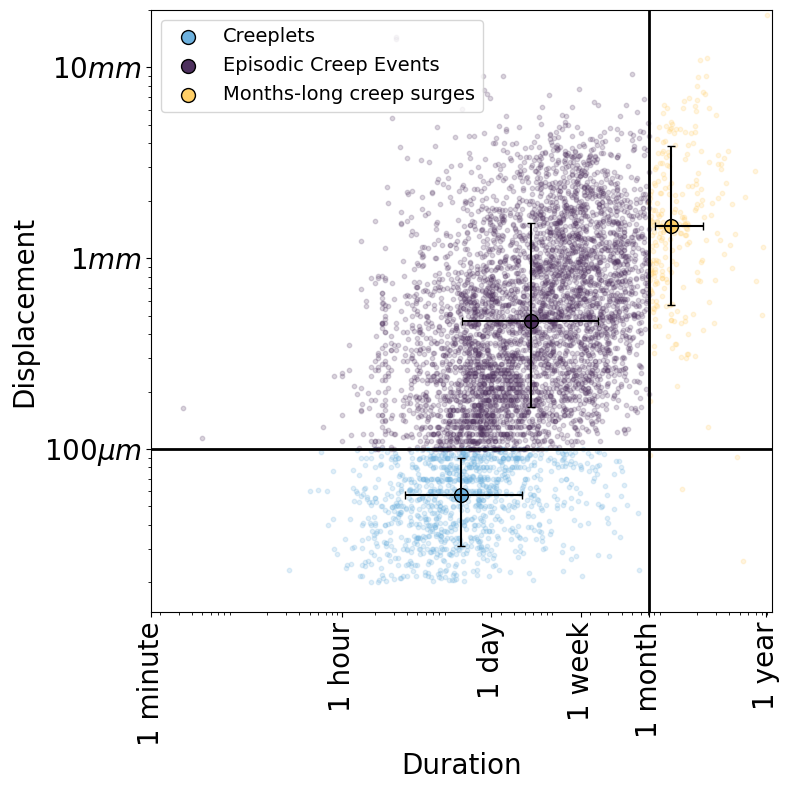

In [13]:
plt.figure(figsize=(8,8))
axis = plt.subplot(1,1,1)
plt.scatter(df_creeplet['Duration, hrs'],df_creeplet['Displacement, mm'],color = rgb2hex(colours[8]),s=10,alpha=0.2)
axis.errorbar(np.median(df_creeplet['Duration, hrs']), np.median(df_creeplet['Displacement, mm']), 
              xerr=[[np.median(df_creeplet['Duration, hrs'])-np.percentile(df_creeplet['Duration, hrs'],15)],
                    [np.percentile(df_creeplet['Duration, hrs'],85)-np.median(df_creeplet['Duration, hrs'])]], 
              yerr=[[np.median(df_creeplet['Displacement, mm'])-np.percentile(df_creeplet['Displacement, mm'],15)],
                    [np.percentile(df_creeplet['Displacement, mm'],85)-np.median(df_creeplet['Displacement, mm'])]], 
                    fmt='none', ecolor='k', capsize=3)
plt.scatter(np.median(df_creeplet['Duration, hrs']),np.median(df_creeplet['Displacement, mm']),color = rgb2hex(colours[8]),
            label = 'Creeplets',s=100,edgecolors='k')

plt.scatter(df_ce['Duration, hrs'],df_ce['Displacement, mm'],color = rgb2hex(colours[5]),s=10,alpha=0.2)
axis.errorbar(np.median(df_ce['Duration, hrs']), np.median(df_ce['Displacement, mm']), 
              xerr=[[np.median(df_ce['Duration, hrs'])-np.percentile(df_ce['Duration, hrs'],15)],
                    [np.percentile(df_ce['Duration, hrs'],85)-np.median(df_ce['Duration, hrs'])]], 
              yerr=[[np.median(df_ce['Displacement, mm'])-np.percentile(df_ce['Displacement, mm'],15)],
                    [np.percentile(df_ce['Displacement, mm'],85)-np.median(df_ce['Displacement, mm'])]], 
                    fmt='none', ecolor='k', capsize=3)
plt.scatter(np.median(df_ce['Duration, hrs']),np.median(df_ce['Displacement, mm']),color = rgb2hex(colours[5]),
            label = 'Episodic Creep Events',s=100,edgecolors='k')

plt.scatter(df_surge['Duration, hrs'],df_surge['Displacement, mm'],color = rgb2hex(colours[0]),s=10,alpha=0.2)
axis.errorbar(np.median(df_surge['Duration, hrs']), np.median(df_surge['Displacement, mm']), 
              xerr=[[np.median(df_surge['Duration, hrs'])-np.percentile(df_surge['Duration, hrs'],15)],
                    [np.percentile(df_surge['Duration, hrs'],85)-np.median(df_surge['Duration, hrs'])]], 
              yerr=[[np.median(df_surge['Displacement, mm'])-np.percentile(df_surge['Displacement, mm'],15)],
                    [np.percentile(df_surge['Displacement, mm'],85)-np.median(df_surge['Displacement, mm'])]], 
                    fmt='none', ecolor='k', capsize=3)
plt.scatter(np.median(df_surge['Duration, hrs']),np.median(df_surge['Displacement, mm']),color = rgb2hex(colours[0]),label = 'Months-long creep surges',s=100,edgecolors='k')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Displacement',fontsize=20)
plt.xlabel('Duration',fontsize=20) 
axis.set_xticks([1/60, 1, 24, 168,720,8760])
axis.set_yticks([0.01,0.1,1,10])
axis.set_xticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'],fontsize=20,rotation=90)
axis.set_yticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'],fontsize=20)
plt.hlines(0.1,0,10000,colors='k',linewidth=2)
plt.vlines(720,0,20,colors='k',linewidth=2)
plt.ylim([0,20])
plt.xlim([1/60,10000])
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/transients_dur_vs_disp.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/2149047176.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,20])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


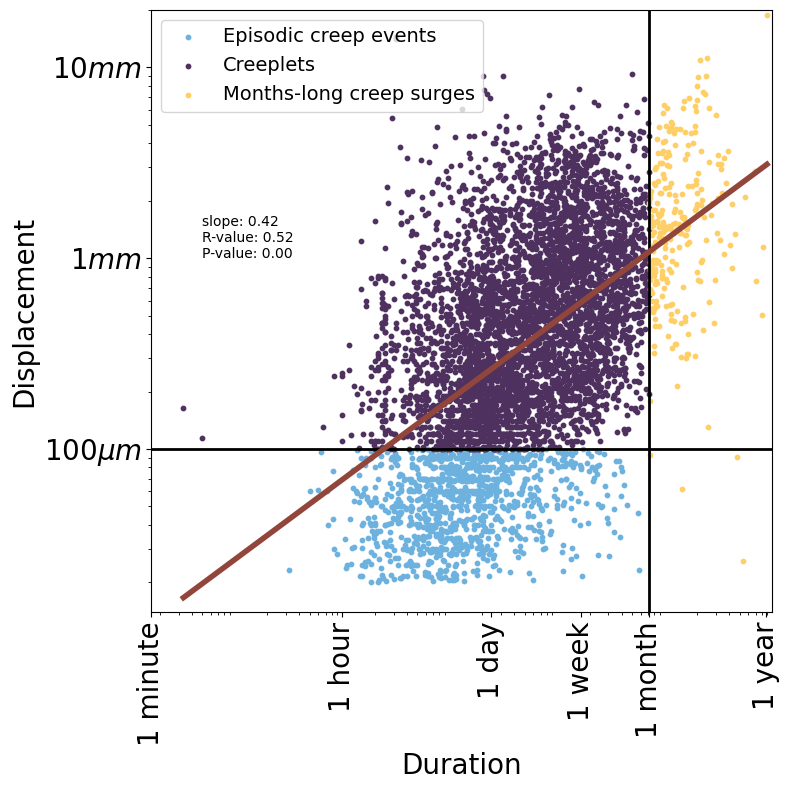

In [14]:
plt.figure(figsize=(8,8))
axis = plt.subplot(1,1,1)
plt.scatter(df_creeplet['Duration, hrs'],df_creeplet['Displacement, mm'],color = rgb2hex(colours[8]),s=10,label='Episodic creep events')


plt.scatter(df_ce['Duration, hrs'],df_ce['Displacement, mm'],color = rgb2hex(colours[5]),s=10,label='Creeplets')


plt.scatter(df_surge['Duration, hrs'],df_surge['Displacement, mm'],color = rgb2hex(colours[0]),s=10,label='Months-long creep surges')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Displacement',fontsize=20)
plt.xlabel('Duration',fontsize=20) 
axis.set_xticks([1/60, 1, 24, 168,720,8760])
axis.set_yticks([0.01,0.1,1,10])
axis.set_xticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'],fontsize=20,rotation=90)
axis.set_yticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'],fontsize=20)
plt.hlines(0.1,0,10000,colors='k',linewidth=2)
plt.vlines(720,0,20,colors='k',linewidth=2)
plt.ylim([0,20])
plt.xlim([1/60,10000])
plt.legend(fontsize=14)


x = df_all['Duration, hrs']
y = df_all['Displacement, mm']



# Take log10 of both axes
log_x = np.log10(x)
log_y = np.log10(y)

# Perform linear regression on log-log data
result = linregress(log_x, log_y)
slope = result.slope
intercept = result.intercept

# Best-fit line in log space
log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
log_y_fit = slope * log_x_fit + intercept

# Convert back to linear space for plotting
x_fit = 10**log_x_fit
y_fit = 10**log_y_fit

plt.plot(x_fit, y_fit, color=colours[3],linewidth=4,zorder=10)
plt.text(0.05,1,f"slope: {slope:.2f}\nR-value: {result.rvalue:.2f}\nP-value: {result.pvalue:.2f}")

plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/scaling_dur_vs_disp.pdf')
plt.show()

In [67]:
def scatter_points(instrument_dataframe,event_dataframe,axis,cmap,xticks=True,yticks=True):
    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_xlim([1/60,10000])
    axis.set_ylim([0,20])
    x = []
    y= []
    total_events = 0
    for i in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
        colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
        #print(abbrv)
        try:
            instrument_df = event_dataframe[event_dataframe['Creepmeter_abbrv'] == abbrv]
            total_events = total_events+len(instrument_df)
            print(f'{abbrv} has {len(instrument_df)} events')
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)
            if abbrv not in ['SU30']:
                x.append(dur_med)
                y.append(disp_med)


            # Asymmetric error bars
            xerr = [[dur_med-dur15], [dur85-dur_med]]
            yerr = [[disp_med-disp15], [disp85-disp_med]]
            #print(xerr,yerr)

            
            axis.errorbar(dur_med, disp_med, xerr=xerr, yerr=yerr, fmt='none', ecolor='k', alpha=0.5, capsize=3)
            if abbrv in ['SU30','XHSW','XRSW','XSH1','DS30']:
                axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='s')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='s')
            elif abbrv in ['RR45','CHA1']:
                axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='^')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='^')
            elif abbrv in ['SH30','CAN1']:
                axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k',marker='D')
            else:
                axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
                
            
        

        except IndexError:
            print('no events')

    # Take log10 of both axes
    log_x = np.log10(x)
    log_y = np.log10(y)

    # Perform linear regression on log-log data
    result = linregress(log_x, log_y)
    slope = result.slope
    intercept = result.intercept

    # Best-fit line in log space
    log_x_fit = np.linspace(log_x.min(), log_x.max(), 100)
    log_y_fit = slope * log_x_fit + intercept

    # Convert back to linear space for plotting
    x_fit = 10**log_x_fit
    y_fit = 10**log_y_fit
    if abbrv not in ['CFW1','CAN1']:
    # Plot the best-fit line
        plt.plot(x_fit, y_fit, color="k",linewidth=2,zorder=10)
        plt.text(168,6,f"slope: {slope:.2f}\nR-value: {result.rvalue:.2f}\nP-value: {result.pvalue:.2f}")

    # First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
    legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,fontsize=10)

    # Define representative event counts for the size legend
    size_legend_values = [10, 100, 500, 1000]  # Adjust as needed
    size_legend_labels = [f'{val} Events' for val in size_legend_values]


    # Create properly sized legend markers
    size_legend_handles = [
        axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
        for size, label in zip(size_legend_values, size_legend_labels)]
    if instrument_dataframe['Network'].iloc[0] in ['HAY']:
        legend2 = plt.legend(
            handles=size_legend_handles, title='Number of Events',
            loc='lower left', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
        )
        plt.gca().add_artist(legend2)  # Add the second legend

    # Add both legends
    plt.gca().add_artist(legend1)  # Keep the first legend
    
    # Set custom tick positions
    if xticks== True:
        axis.set_xticks([1/60,1, 24, 168,720,8760])
        axis.set_xticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year'],rotation=90)
        axis.set_xlabel('Duration')
    
    else:
        axis.set_xticks([1/60,1, 24, 168,720,8760])
        axis.set_xticklabels(['', '', '','',''],rotation=90)
        
    if yticks == True:
        axis.set_yticks([0.01,0.1,1,10])
        axis.set_yticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'])
        axis.set_ylabel('Displacement')
    else:
        axis.set_yticks([0.01,0.1,1,10])
        axis.set_yticklabels([ '', '','',''],fontsize=20)

    plt.text(168,0.015,f'{total_events} events')
    return

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value enc

CPP1 has 2 events
CTM1 has 17 events
COZ1 has 169 events
CHP1 has 0 events
no events
CFW1 has 314 events
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
XSH1 has 47 events
SJN1 has 107 events
XSJ2 has 83 events
XSJ3 has 71 events
XHR1 has 23 events
XHR2 has 106 events
XHR3 has 80 events
CWC3 has 73 events
CWN1 has 228 events
FCR1 has 34 events
XMR1 has 317 events
XSC1 has 97 events
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
XMM1 has 1171 events
XMD1 has 459 events
XVA1 has 319 events
XRSW has 39 events
XPK1 has 137 events
XPK2 has 130 events
XTA1 has 204 events
XHSW has 71 events
WKR1

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array w

QE30 has 12 events
IR30 has 1 events
NS45 has 5 events
FE30 has 13 events
SC30 has 89 events
DU30 has 56 events
SH30 has 16 events
SU30 has 27 events
RR45 has 45 events
SEL1 has 15 events
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
TEP1 has 16 events
PET1 has 13 events
WSZ1 has 50 events
ESZ1 has 33 events
INW1 has 18 events
ISW1 has 47 events
CHE1 has 89 events
HAM1 has 66 events
CER1 has 18 events
PAN1 has 20 events
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
PAS1 has 20 events
SIV1 has 123 events
HAT1 has 7 events
ORM1 has 7 events
TAS1 has 5 events
YZE1 has 3 events
GOZ1 has 1 

/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/3185182456.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.sc

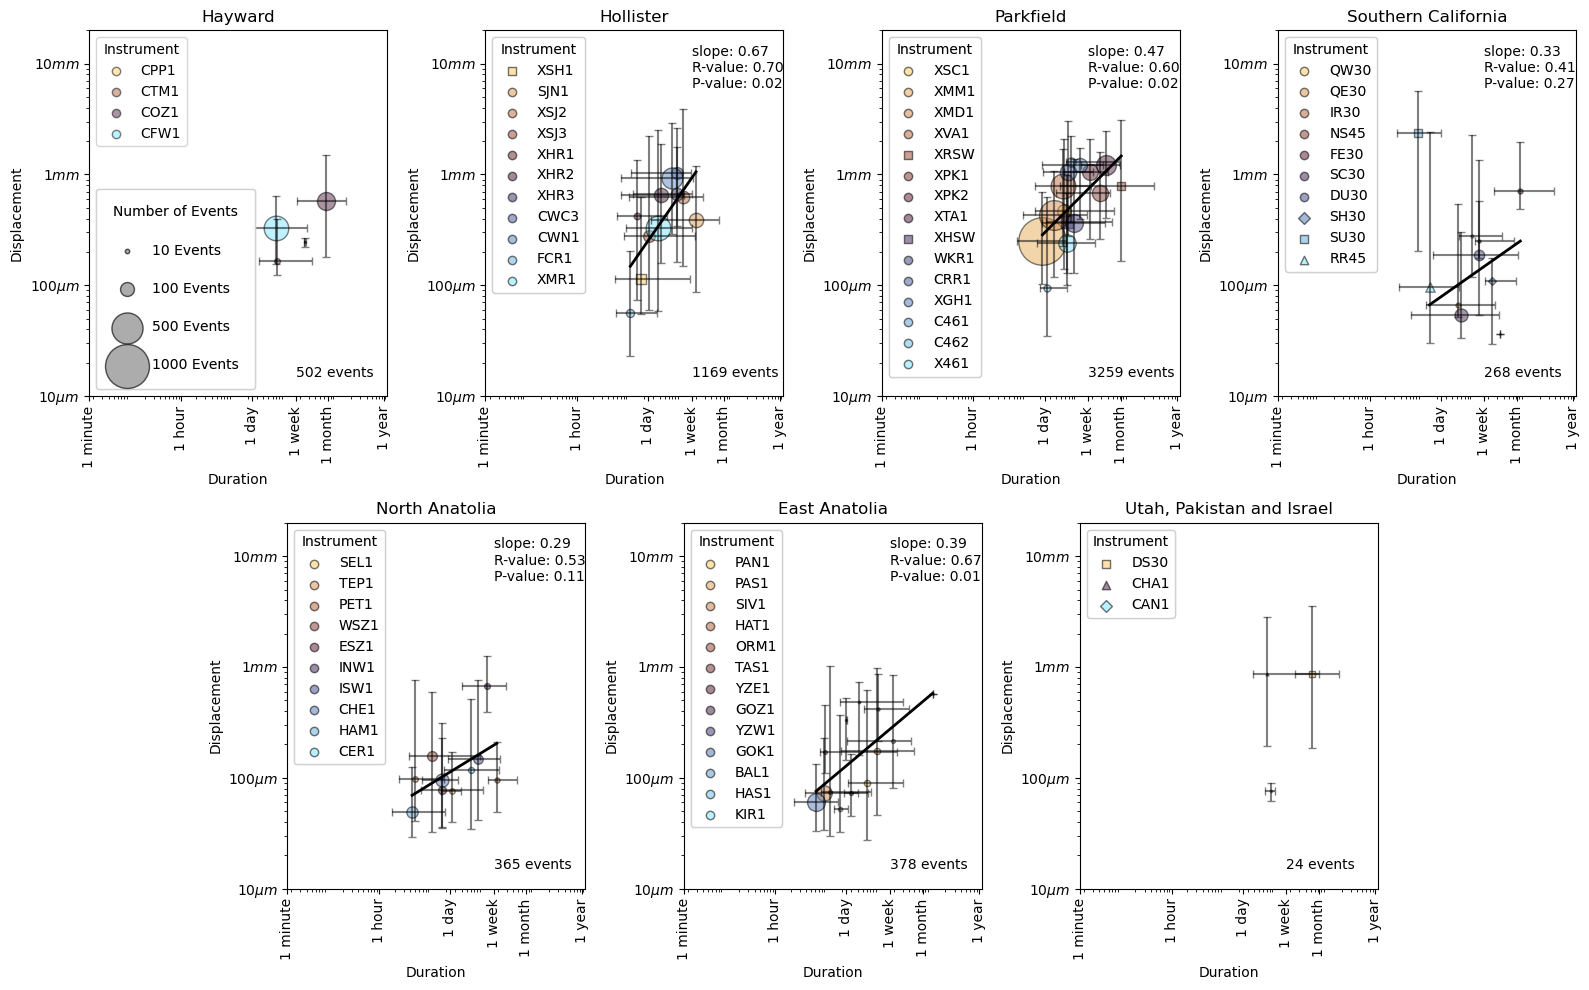

In [68]:
#df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_04_APR_2025.csv",index_col=0)
fig = plt.figure(figsize=(16,10))
axa = plt.subplot2grid((4, 8), (0, 0), colspan=2,rowspan=2)
axa.set_title("Hayward")
scatter_points(HAY,df_all,axa,cmap,xticks=True,yticks=True)
axb = plt.subplot2grid((4, 8), (0, 2), colspan=2, rowspan=2)
axb.set_title("Hollister")
scatter_points(HOL,df_all,axb,cmap,xticks=True,yticks=True)  
axc = plt.subplot2grid((4, 8), (0, 4), colspan=2, rowspan=2) 
axc.set_title("Parkfield")
scatter_points(PARK,df_all,axc,cmap,xticks=True,yticks=True) 
axd = plt.subplot2grid((4, 8), (0, 6), colspan=2, rowspan=2)
axd.set_title("Southern California")
scatter_points(SOCAL,df_all,axd,cmap,xticks=True,yticks=True)
axe = plt.subplot2grid((4, 8), (2, 1), colspan=2, rowspan=2) 
axe.set_title("North Anatolia")  
scatter_points(NAF,df_all,axe,cmap,xticks=True,yticks=True)         
axf = plt.subplot2grid((4, 8), (2, 3), colspan=2, rowspan=2) 
axf.set_title("East Anatolia")
scatter_points(EAF,df_all,axf,cmap,xticks=True,yticks=True) 
axg = plt.subplot2grid((4, 8), (2, 5), colspan=2, rowspan=2)
axg.set_title("Utah, Pakistan and Israel")
others = pd.concat([DSF,CHAF,UTA])
scatter_points(others,df_all,axg,cmap,xticks=True,yticks=True) 
fig.tight_layout()
#plt.savefig('../../Creep_catalog_stats_figures/duration_vs_displacement_regions.pdf')
plt.show()

In [17]:
HAY

Unnamed: 0 Network Creepmeter_abbrv File_code                   Start Time  \
0          18     HAY             CPP1   CPP1_1T  2020-01-22T19:54:00.000000Z   
1          21     HAY             CTM1   CTM1_1T  2020-01-07T16:25:00.000000Z   
2          15     HAY             COZ1   COZ1_1T  2020-01-07T17:24:00.000000Z   
3          13     HAY             CHP1   CHP1_1T  2020-01-08T01:00:59.000000Z   
4           6     HAY             CFW1   CFW1_1T  2020-01-07T19:25:00.000000Z   

                      End Time  Sampling rate, Hz Sampling rate, mins  \
0  2024-06-26T23:59:00.000000Z           0.016667                  1T   
1  2024-10-09T18:58:00.000000Z           0.016667                  1T   
2  2024-10-09T19:07:00.000000Z           0.016667                  1T   
3  2024-10-09T19:08:59.000000Z           0.016667                  1T   
4  2024-10-09T19:17:00.000000Z           0.016667                  1T   

   Latitude  Longitude Length  Depth  Obliquity     Creepmeter_full_name  
0    37.990   -122.356   30 m   2  m       30.0                Pt Pinole  
1    37.844   -122.227   30 m    1 m       30.0                 Temescal  
2    37.753   -122.150   30 m  1.5 m       30.0              Oakland Zoo  
3    37.663   -122.074   20 m    1 m       30.0  Hayward Palisades St #2  
4    37.532   -121.952   25 m    1 m       30.0           Fremont Winery

In [18]:
def scatter_points_all(instrument_dataframe,event_dataframe,axis,cmap):
    axis.set_xlabel('Duration')
    axis.set_ylabel('Displacement')
    axis.set_xscale('log')
    axis.set_yscale('log')
    no_networks = np.unique(instrument_dataframe['Network'])

    for i in range(len(no_networks)):
        network = no_networks[i]
        colours  = cmap(np.linspace(0, 1, len(no_networks)))
        #print(abbrv)
        try:
            instrument_df = event_dataframe[event_dataframe['Network'] == network]
            print(f'{network} has {len(instrument_df)} events')

            #print(len(instrument_df))
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)


            # Asymmetric error bars
            xerr = [[dur_med-dur15], [dur85-dur_med]]
            yerr = [[disp_med-disp15], [disp85-disp_med]]
            
            axis.errorbar(dur_med, disp_med, xerr=xerr, yerr=yerr, fmt='none', ecolor=rgb2hex(colours[i]), alpha=0.5, capsize=3)
            axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5)
            axis.scatter([],[],c=colours[i],alpha=0.5,label=network)
        

        except IndexError:
            print('no events')


    # First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
    legend1 = plt.legend(title="Region", loc="upper left", frameon=True)

    # Define representative event counts for the size legend
    size_legend_values = [10, 100, 500, 1000]  # Adjust as needed
    size_legend_labels = [f'{val} Events' for val in size_legend_values]


    # Create properly sized legend markers
    size_legend_handles = [
        axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
        for size, label in zip(size_legend_values, size_legend_labels)]

    legend2 = plt.legend(
            handles=size_legend_handles, title='Number of Events',
            loc='lower right', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
        )
    plt.gca().add_artist(legend2)  # Add the second legend

    # Add both legends
    plt.gca().add_artist(legend1)  # Keep the first legend
    
    # Set custom tick positions
    axis.set_xticks([ 1, 24, 168,720,8760])
    axis.set_yticks([0.01,0.1,1,10])
    axis.set_xticklabels(['1 hour', '1 day', '1 week','1 month','1 year'],fontsize=20,rotation=90)
    axis.set_yticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$'],fontsize=20)
    return

In [19]:
'''plt.figure(figsize=(10,10))
axa = plt.subplot(2,2,1)
scatter_points(HAY,df_all,axa,cmap,xticks=False,yticks=True)
axb = plt.subplot(2,2,2)
scatter_points(HOL,df_all,axb,cmap,xticks=False,yticks=False)
axc = plt.subplot(2,2,3)
scatter_points(PARK,df_all,axc,cmap,xticks=True,yticks=True)
axd = plt.subplot(2,2,4)
scatter_points(SOCAL,df_all,axd,cmap,xticks=True,yticks=False)
plt.show()'''

'plt.figure(figsize=(10,10))\naxa = plt.subplot(2,2,1)\nscatter_points(HAY,df_all,axa,cmap,xticks=False,yticks=True)\naxb = plt.subplot(2,2,2)\nscatter_points(HOL,df_all,axb,cmap,xticks=False,yticks=False)\naxc = plt.subplot(2,2,3)\nscatter_points(PARK,df_all,axc,cmap,xticks=True,yticks=True)\naxd = plt.subplot(2,2,4)\nscatter_points(SOCAL,df_all,axd,cmap,xticks=True,yticks=False)\nplt.show()'

CAL has 47 events
CHAF has 4 events
DSF has 18 events
EAF has 378 events
HAY has 502 events
HOL has 1122 events
NAF has 365 events
PARK has 3259 events
RID has 1 events
SOCAL has 268 events
UTA has 2 events


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/2358877068.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=network)


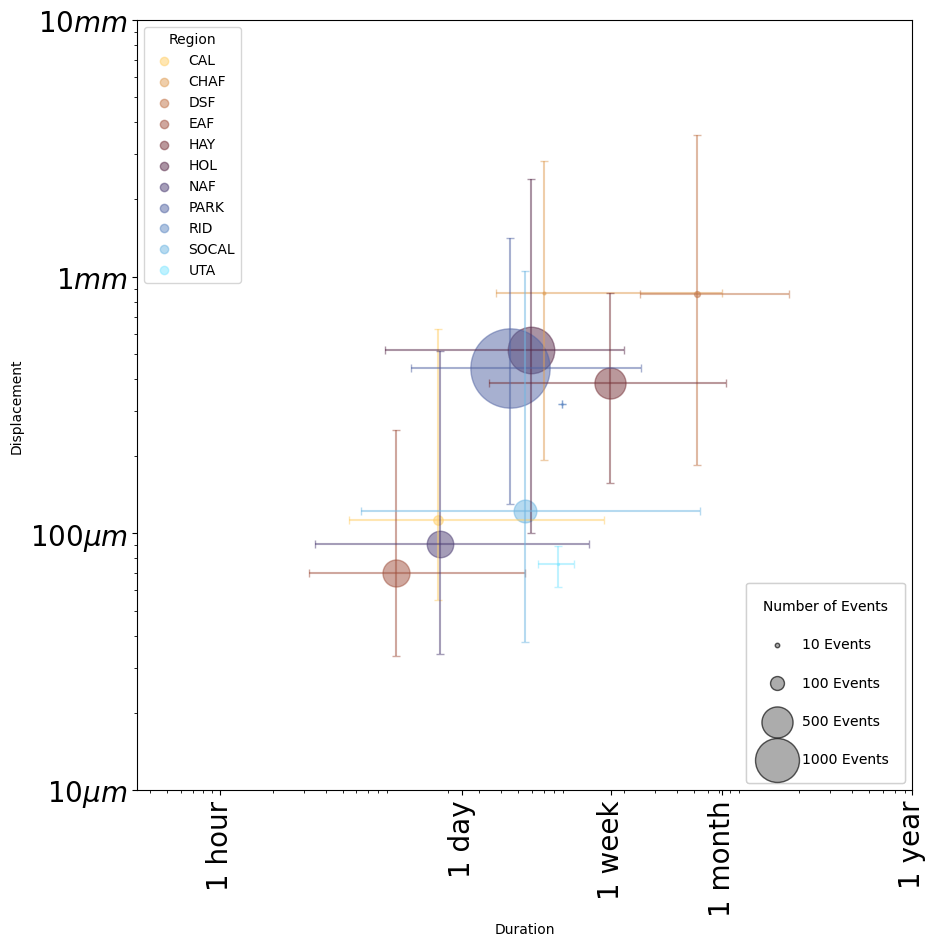

In [20]:
plt.figure(figsize=(10,10))
axa = plt.subplot(1,1,1)
scatter_points_all(creepmeters,df_all,axa,cmap)
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_34165/3185182456.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_34165/3185182456.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')


SEL1 has 15 events
TEP1 has 16 events
PET1 has 13 events
WSZ1 has 50 events
ESZ1 has 33 events
INW1 has 18 events
ISW1 has 47 events
CHE1 has 89 events
HAM1 has 66 events
CER1 has 18 events
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
PAN1 has 20 events
PAS1 has 20 events
SIV1 has 123 events
HAT1 has 7 events
ORM1 has 7 events
TAS1 has 5 events
YZE1 has 3 events
GOZ1 has 1 events
YZW1 has 8 events
KAR1 has 0 events
no events
GOK1 has 166 events
BAL1 has 2 events
HAS1 has 9 events
KIR1 has 7 events
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_34165/3185182456.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_34165/3185182456.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='k')
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value e

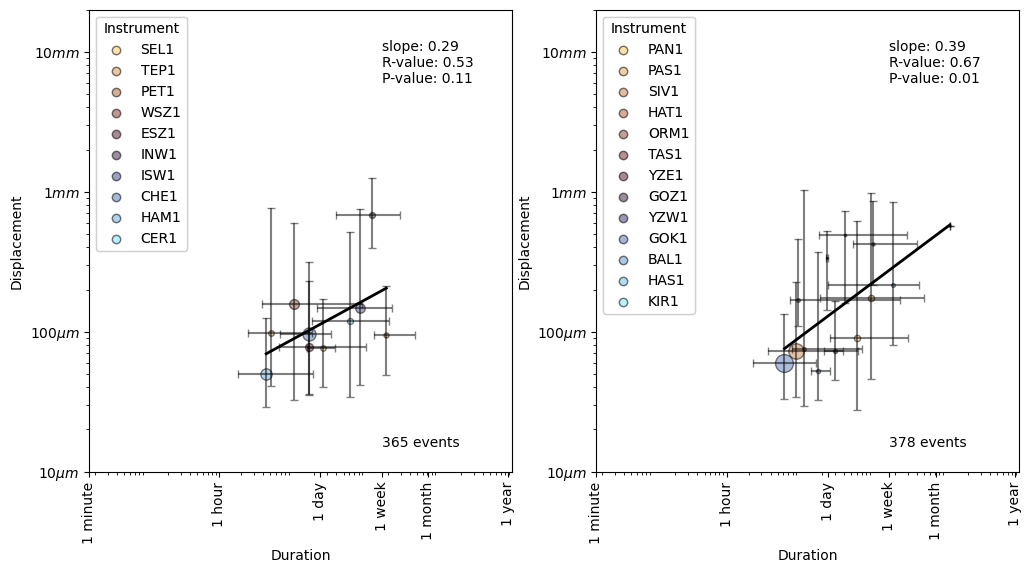

In [27]:
plt.figure(figsize=(12,6))
axa = plt.subplot(1,2,1)
scatter_points(NAF,df_all,axa,cmap)
axb = plt.subplot(1,2,2)
scatter_points(EAF,df_all,axb,cmap)
plt.show()

In [21]:
def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1

def scale_bar(ax, proj, length, location=(0.2, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """

    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [pe.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [pe.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


def cm_plotter(ax,creepmeters_list,gdf,extent,color,shift,scale,show_labels=True):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    # Add Fault geometries
    ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    # Add gridlines with specific label font sizes
    gl = ax.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(extent[0], 1), np.round(extent[1], 1)
        lat_min, lat_max = np.round(extent[2], 1), np.round(extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range < 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range < 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    # Add annotation with an arrow and transform
    for i in range(len(creepmeters_list)):
        abbrv = creepmeters_list['Creepmeter_abbrv'].iloc[i]
        lat = creepmeters_list['Latitude'].iloc[i]
        long = creepmeters_list['Longitude'].iloc[i]
        face_color = rgb2hex(color[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if abbrv in ['XRSW', 'XTA1','XHSW', 'C461','CWN1','CRR1','XMM1','XSJ3','XHR2','QE30','NS45','DU30','RA','GS']:
                xytext_lon = long - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = long + 0.1
            if abbrv in ['CPP1','CWC3','CWN1','XSJ2']:
                xytext_lat = lat-0.01
            elif abbrv in ['X461','XPK2']:
                xytext_lat = lat-0.02
            elif abbrv in ['XRSW']:
                xytext_lat = lat+0.01

            else:
                xytext_lat = lat
        if shift == 'vertical':
            if abbrv in ['QE30','NS45','SC30']:
                xytext_lon = long 
                xytext_lat = lat + 0.2
            elif abbrv in ['DU30']:
                xytext_lon = long + 0.2
                xytext_lat = lat
            else:
                xytext_lon = long 
                xytext_lat = lat - 0.2
        
        
        
        ax.annotate(
            creepmeters_list['Creepmeter_abbrv'].iloc[i], 
            xy=(creepmeters_list['Longitude'].iloc[i], creepmeters_list['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        ax.scatter(
            creepmeters_list['Longitude'].iloc[i], 
            creepmeters_list['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
        scale_bar(ax, ccrs.PlateCarree(), scale)
    return





def ymd_to_ydec(ST):
    y = int(ST.strftime("%Y"))
    dt_starter = dt.datetime(y,1,1,0,0,0)
    diff = (ST.replace(tzinfo=None)-dt_starter)/dt.timedelta(days=1)
    isleapyear = calendar.isleap(y)
    if isleapyear == True:
        diff_dec = diff/366
    else:
        diff_dec = diff/365
    date_dec = y+diff_dec
    return date_dec


    

In [22]:
def mapsubplot(axis,extent,cmap,instrument_dataframe,faults,scale,shift):
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()
    # Add OpenStreetMap tiles to the plot
    axis.add_image(osm, 10)  # Zoom level of 8  
    # Add natural earth features for oceans and lakes
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axis.add_feature(ocean, zorder=0)  # Add oceans first
    axis.add_feature(lakes, zorder=1)  # Add lakes
    axis.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axis.coastlines(resolution='50m')
    cm_plotter(axis,instrument_dataframe,faults,extent,colours,shift,scale)
    return

In [23]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", message="Approximating coordinate system")

hollister_extent = [-121.75,-121.0,36.5,37.0]
hayward_extent = [-122.4,-121.8,37.5,38]
parkfield_extent = [-120.75,-120.1,35.65,36.1]
salton_sea_extent = [-116.25,-115.25,32.5,34]
RID_extent = [-118,-117, 35.2,35.8]




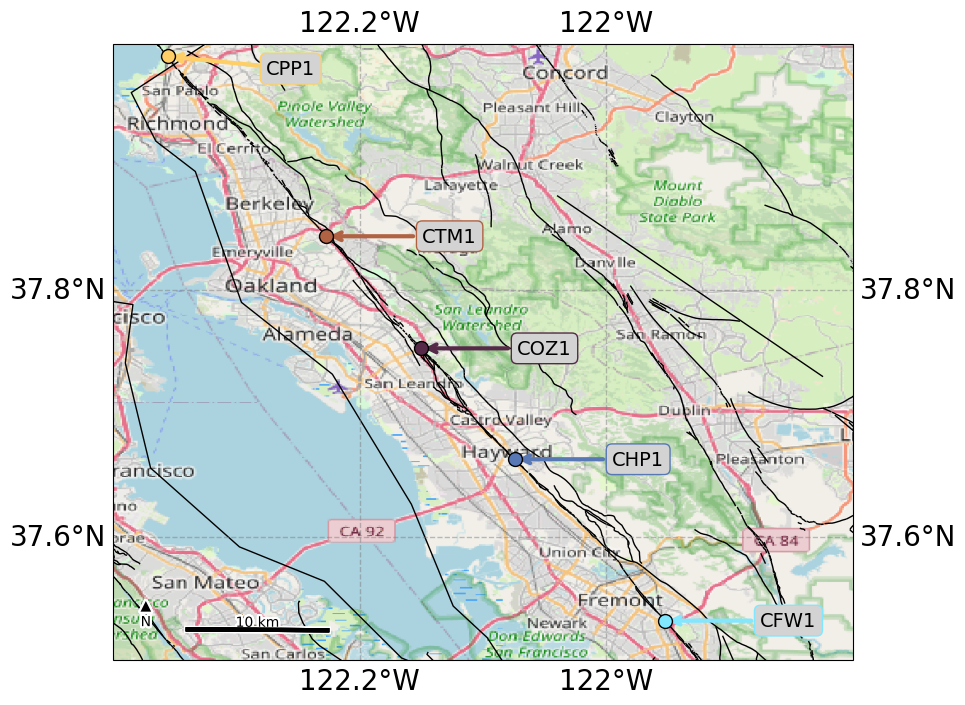

In [31]:
fig = plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axa,hayward_extent,cmap,HAY,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/Hayward_map.pdf')
plt.show()

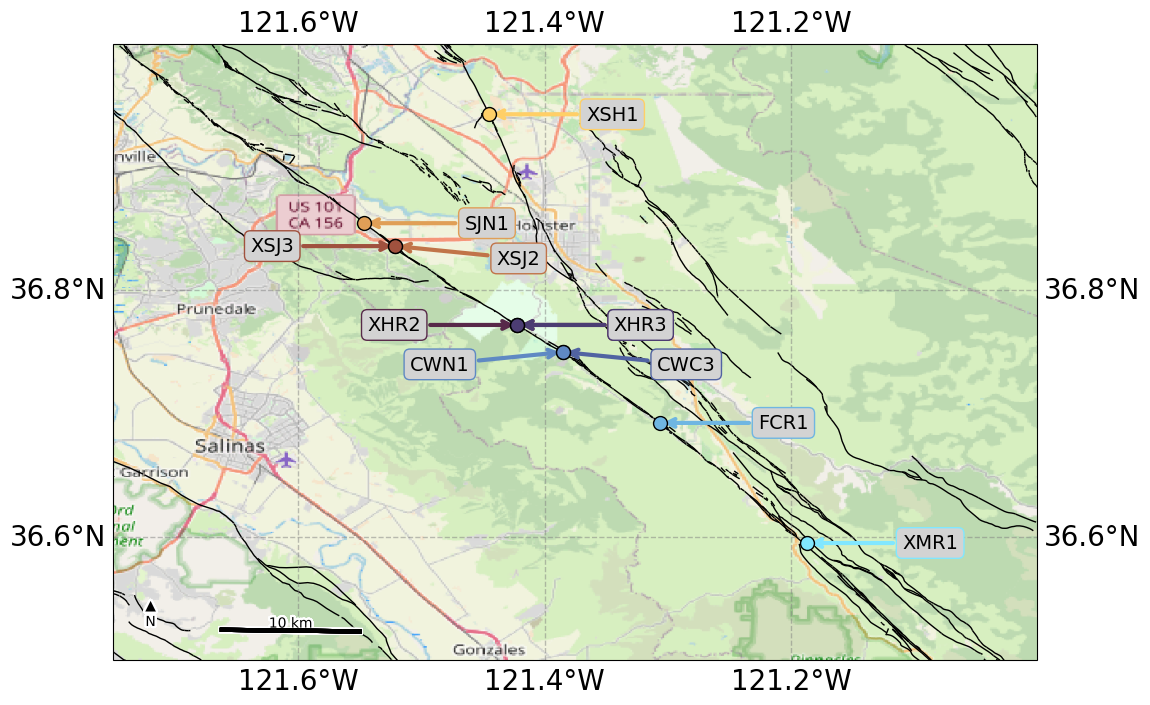

In [32]:
fig = plt.figure(figsize=(20,8))
axb = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axb,hollister_extent,cmap,HOL,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/Hollister_map.pdf')
plt.show()



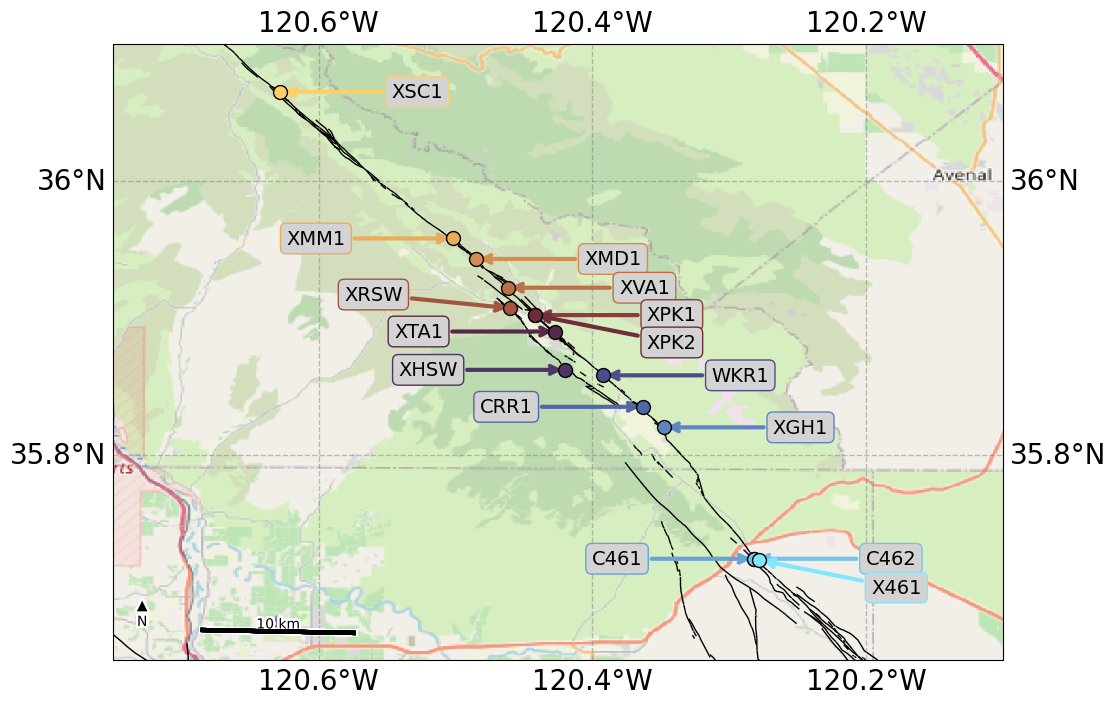

In [33]:
fig = plt.figure(figsize=(20,8))
axc = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axc,parkfield_extent,cmap,PARK,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/Parkfield_map.pdf')
plt.show()


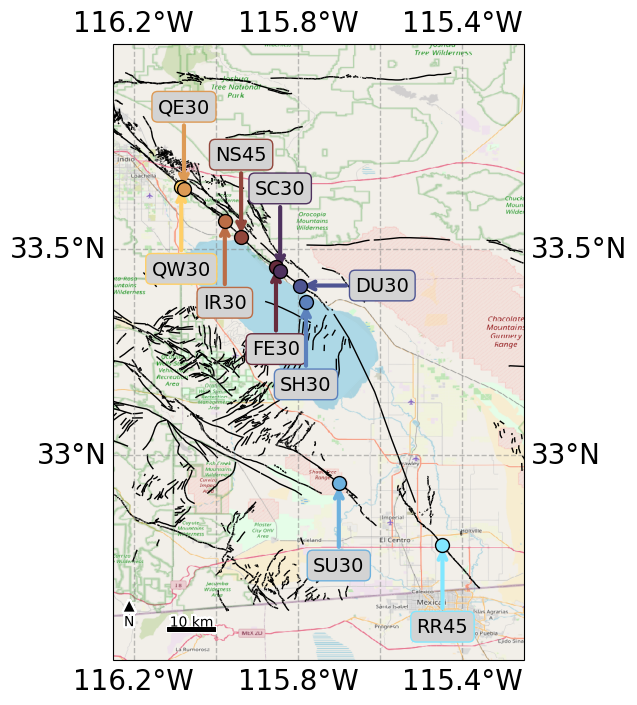

In [34]:
fig = plt.figure(figsize=(20,8))
axd = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axd,salton_sea_extent,cmap,SOCAL,gdf_Cali,10,'vertical')
plt.savefig('../../Creep_catalog_stats_figures/SOCAL_map.pdf')
plt.show()

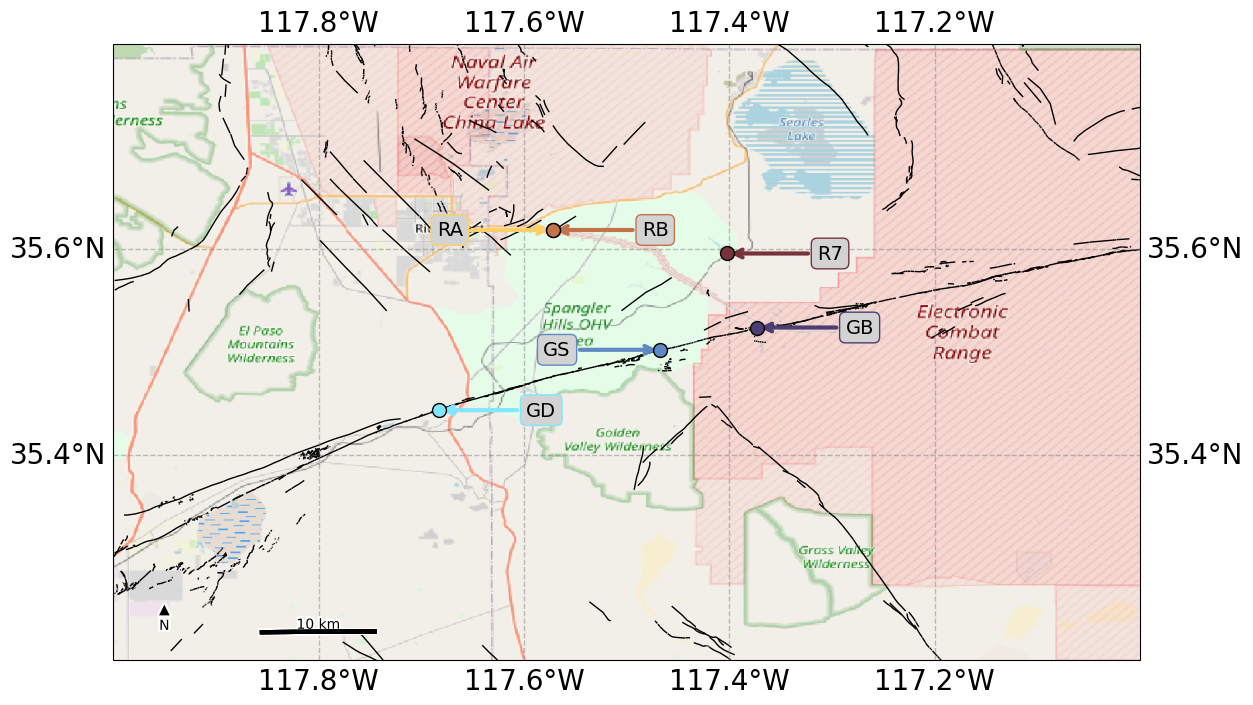

In [35]:
fig = plt.figure(figsize=(20,8))
axe = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axe,RID_extent,cmap,RID,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/Ridgecrest_map.pdf')
plt.show()

In [36]:
def NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [37]:
def EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap,show_labels=True):
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()

    # Add OpenStreetMap tiles to the plot
    axa.add_image(osm, 10)  # Zoom level of 8 

    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')

    axa.set_extent(EAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
        lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False


    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(EAF)))


    for i in range(len(EAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if EAF['Creepmeter_abbrv'].iloc[i] in ['XRSW', 'XTA1','XHSW', 'C461','CWN1/CWC3','CRR1','XMM1','QW30','SC30/72/TE']:
                xytext_lon = EAF['Longitude'].iloc[i] - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = EAF['Longitude'].iloc[i] + 0.1
            xytext_lat = EAF['Latitude'].iloc[i]
        if shift == 'vertical':
            xytext_lon = EAF['Longitude'].iloc[i] 
            xytext_lat = EAF['Latitude'].iloc[i] + 0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['TAS1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.3
                xytext_lat = EAF['Latitude'].iloc[i]
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZW1','BAL1']:
                xytext_lon = EAF['Longitude'].iloc[i]
                xytext_lat = EAF['Latitude'].iloc[i]-0.3
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZE1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.2
                xytext_lat = EAF['Latitude'].iloc[i]-0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['PAS1']:
                xytext_lon = EAF['Longitude'].iloc[i] 
                xytext_lat = EAF['Latitude'].iloc[i] - 0.2
        
        
        axa.annotate(
            EAF['Creepmeter_abbrv'].iloc[i], 
            xy=(EAF['Longitude'].iloc[i], EAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            EAF['Longitude'].iloc[i], 
            EAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [38]:
def NAF_map_Zoom(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)+2))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i+2])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [39]:
pakistan_extent = [61, 78, 23, 38]
EAF_extent = [36.0, 40.25, 36.0, 39]
NAF_extent = [29.5,33.1,40.4,41.1]
UTA_extent = [-114.2,-108.5, 36.8,42.2]
turkey_extent = [26.0, 45.0, 36.0, 42.0]
NAF_zoom_extent = [31.9,33.1,40.5,41.1]

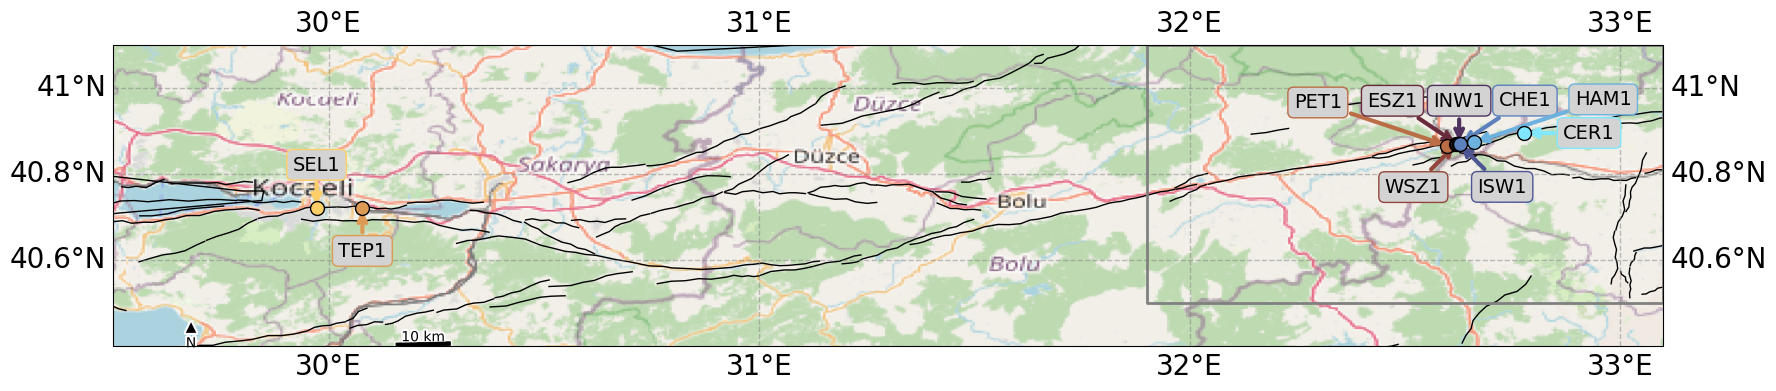

In [40]:
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap)
bbox = box(NAF_zoom_extent[0], NAF_zoom_extent[2], NAF_zoom_extent[1], NAF_zoom_extent[3])
axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor='grey', facecolor='none', linestyle='-', linewidth=2)
plt.savefig('../../Creep_catalog_stats_figures/NAF_map.pdf')
plt.show()

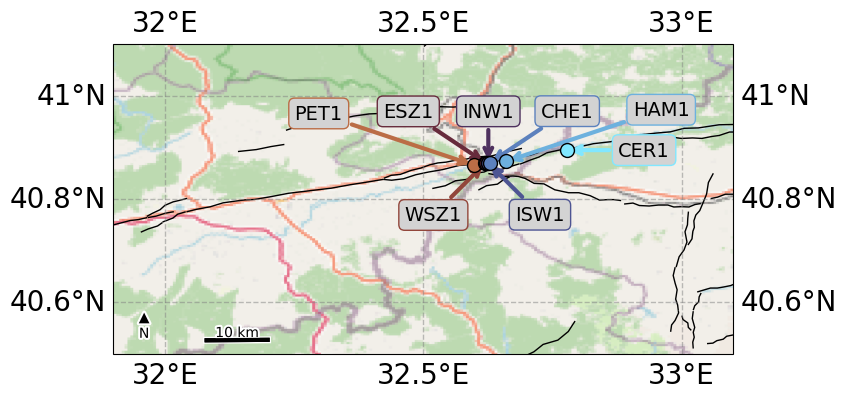

In [41]:

NAF_ZOOM = NAF.copy(deep=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='SEL1'].index,inplace=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='TEP1'].index,inplace=True)
NAF_ZOOM.reset_index(inplace=True,drop=True)
plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map_Zoom(axa,NAF_zoom_extent,gdf_Asia,NAF_ZOOM,cmap)
plt.savefig('../../Creep_catalog_stats_figures/NAF_zoom_map.pdf')
plt.show()

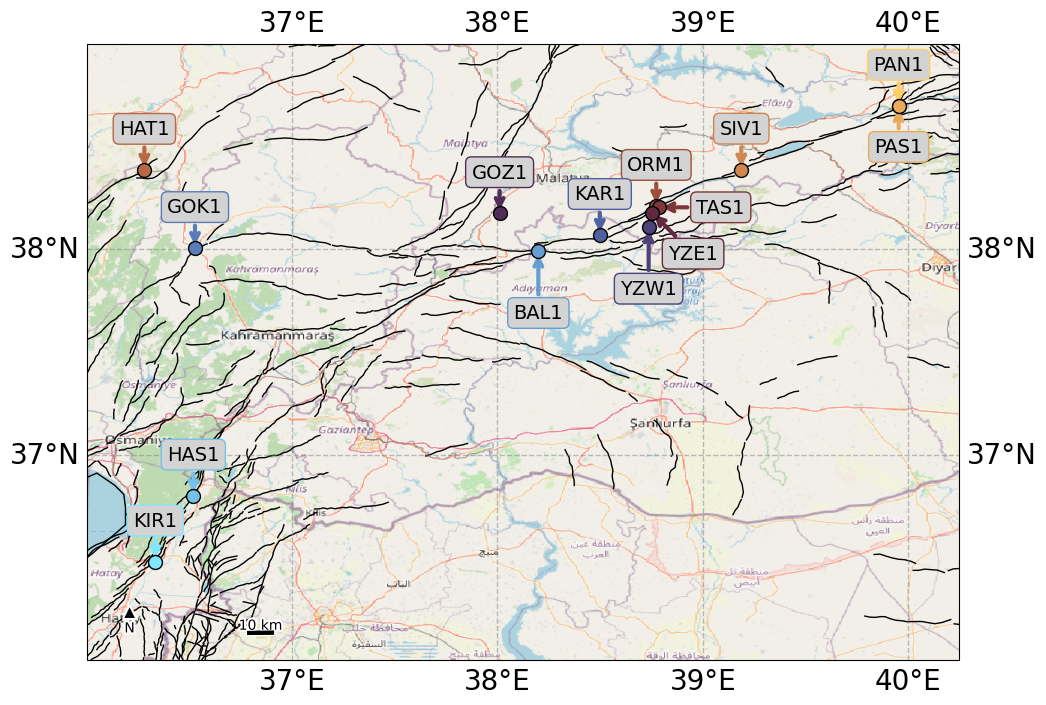

In [42]:
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap)
plt.savefig('../../Creep_catalog_stats_figures/EAF_map.pdf')
plt.show()




In [ ]:
fig = plt.figure(figsize=(6, 6))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(UTA_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Utah.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

# Add state boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

axa.add_feature(states_provinces, edgecolor='red',linewidth=1)
colours  = cmap(np.linspace(0, 1, 3))
for i in range(len(UTA)):
    
    face_color = rgb2hex(colours[0])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = UTA['Longitude'].iloc[i] + 0.2
        xytext_lat = UTA['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = UTA['Longitude'].iloc[i] 
        xytext_lat = UTA['Latitude'].iloc[i]+0.5
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = UTA['Longitude'].iloc[i]
            xytext_lat = UTA['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        UTA['Creepmeter_abbrv'].iloc[i], 
        xy=(UTA['Longitude'].iloc[i], UTA['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        UTA['Longitude'].iloc[i], 
        UTA['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
plt.savefig('../../Creep_catalog_stats_figures/Utah_map.pdf')
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 8)  # Zoom level of 8 
axa.set_extent(pakistan_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Pakistan':
        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)



show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(CHAF)):
    face_color = rgb2hex(colours[1])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = CHAF['Longitude'].iloc[i] + 0.5
        xytext_lat = CHAF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = CHAF['Longitude'].iloc[i] 
        xytext_lat = CHAF['Latitude'].iloc[i]+2
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = CHAF['Longitude'].iloc[i]
            xytext_lat = CHAF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        CHAF['Creepmeter_abbrv'].iloc[i], 
        xy=(CHAF['Longitude'].iloc[i], CHAF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        CHAF['Longitude'].iloc[i], 
        CHAF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 100)
plt.savefig('../../Creep_catalog_stats_figures/Pakistan_map.pdf')
plt.show()

In [ ]:
pakistan_extent = [61, 78, 23, 38]


In [ ]:
Israel_extent = [34.2, 35.9, 29.4, 33.3]

In [ ]:
fig = plt.figure(figsize=(6, 6))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(Israel_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Israel':
        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)



show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(DSF)):
    face_color = rgb2hex(colours[2])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = DSF['Longitude'].iloc[i] + 0.5
        xytext_lat = DSF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = DSF['Longitude'].iloc[i] 
        xytext_lat = DSF['Latitude'].iloc[i]+0.5
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = DSF['Longitude'].iloc[i]
            xytext_lat = DSF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        DSF['Creepmeter_abbrv'].iloc[i], 
        xy=(DSF['Longitude'].iloc[i], DSF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        DSF['Longitude'].iloc[i], 
        DSF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
plt.savefig('../../Creep_catalog_stats_figures/Israel_map.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/1154903268.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter(dur_med,disp_med,s=len(instrument_df),c=colours[i],alpha=0.5)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/1154903268.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)


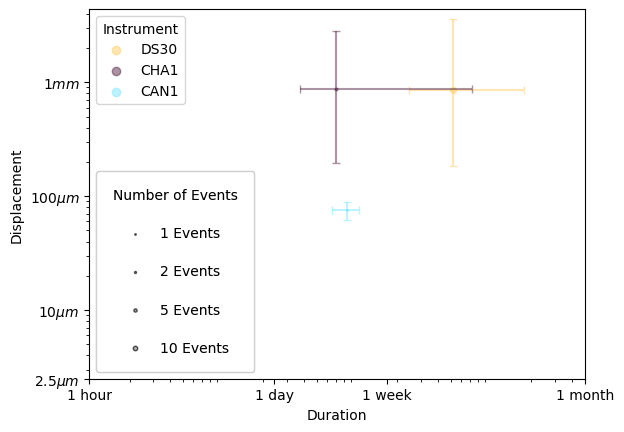

In [24]:
plt.figure()
axis = plt.subplot(1,1,1)


axis.set_xlabel('Duration')
axis.set_ylabel('Displacement')
axis.set_xscale('log')
axis.set_yscale('log')

instrument_dataframe = pd.concat([DSF,CHAF,UTA])



colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
for i in range(len(instrument_dataframe)):
    abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    #print(abbrv)
    try:
        instrument_df = df_all[df_all['Creepmeter_abbrv'] == abbrv]
        #print(len(instrument_df))
        displacement = instrument_df['Displacement, mm']
        duration = instrument_df['Duration, hrs']
        dur_med = np.median(duration)
        dur85 = np.percentile(duration,85)
        dur15 = np.percentile(duration,15)
        disp_med = np.median(displacement)
        disp85 = np.percentile(displacement,85)
        disp15 = np.percentile(displacement,15)


        # Asymmetric error bars
        xerr = [[dur_med-dur15], [dur85-dur_med]]
        yerr = [[disp_med-disp15], [disp85-disp_med]]
        
        axis.errorbar(dur_med, disp_med, xerr=xerr, yerr=yerr, fmt='none', ecolor=colours[i], alpha=0.5, capsize=3)
        axis.scatter(dur_med,disp_med,s=len(instrument_df),c=colours[i],alpha=0.5)
        axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)
    

    except IndexError:
        print('no events')


# First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True)

# Define representative event counts for the size legend
size_legend_values = [1, 2, 5, 10]  # Adjust as needed
size_legend_labels = [f'{val} Events' for val in size_legend_values]


# Create properly sized legend markers
size_legend_handles = [
    axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
    for size, label in zip(size_legend_values, size_legend_labels)]
if instrument_dataframe['Network'].iloc[0] in ['HAY', 'NAF','DSF']:
    # Second legend (Event Sizes)
    if instrument_dataframe['Network'].iloc[0] =='HAY':
        loc = 'lower left'
    else:
        loc = 'lower right'
    legend2 = plt.legend(
        handles=size_legend_handles, title='Number of Events',
        loc='lower left', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
    )
    plt.gca().add_artist(legend2)  # Add the second legend

# Add both legends
plt.gca().add_artist(legend1)  # Keep the first legend

# Set custom tick positions
axis.set_xticks([1, 24, 168,5040])
axis.set_yticks([0.0025,0.01,0.1,1])
# Set custom labels
axis.set_xticklabels(['1 hour', '1 day', '1 week','1 month'])
axis.set_yticklabels([r'2.5$\mu m$', r'10$\mu m$', r'100$\mu m$',r'1$mm$'])
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

<urlopen error [Errno 8] nodename nor servname provided, or not known><urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>
<urlopen error [Errno 8] nodename nor servname provided, or not known>

Error in callback <function _draw_all_if_interactive at 0x7f86e03b9090> (for post_execute):


KeyboardInterrupt: 

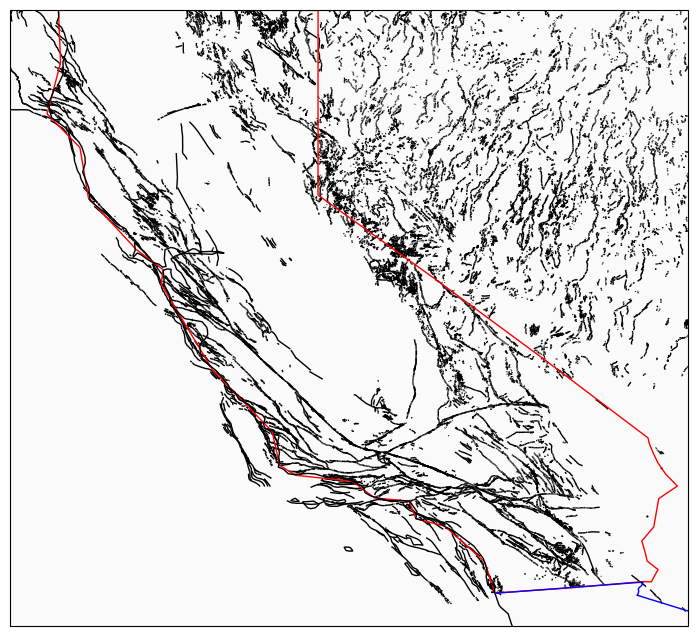

In [25]:
Cali_extent = [-125.0, -114.0, 32.0, 42.0]
fig = plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 6)  # Zoom level of 8 
axa.set_extent(Cali_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_USA.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")

shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')
# Fill California with beige
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        axa.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=1)


axa.coastlines(resolution='50m')
axa.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)
# Add Fault geometries

# Define colors and labels for regions
regions = {
    'Hayward': {'coords': dict(left=-122.4, bottom=37.5, right=-121.8, top=38), 'color': colours[0], 'label': 'fig\n4a.'},
    'Hollister': {'coords': dict(left=-121.75, bottom=36.5, right=-121.0, top=37.0), 'color': colours[1], 'label': 'fig\n5a.'},
    'Parkfield': {'coords': dict(left=-120.75, bottom=35.65, right=-120.1, top=36.1), 'color': colours[2], 'label': 'fig\n6a.'},
    'Salton Sea': {'coords': dict(left=-116.25, bottom=32.5, right=-115.25, top=34), 'color': colours[3], 'label': 'fig\n7a.'},
    'Ridgecrest': {'coords': dict(left=-118, bottom=35.2, right=-117, top=35.8), 'color': colours[4], 'label': 'fig\n8a.'}
}


label_distance = 1.3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    axa.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    axa.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

scale_bar(axa, ccrs.PlateCarree(), 100)
axa.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.5])  # Set height ratios as needed

# First row: two side-by-side plots
ax_left = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax_right = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())

# Second row: single centered plot
ax1 = fig.add_subplot(gs[1, :], projection=ccrs.PlateCarree())


# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')

# Add labels to the subplots
fig.text(-0.1, 1.1, 'a)', transform=ax_left.transAxes, fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
ax_right.text(-0.1, 0.8, 'b)', transform=ax_right.transAxes, fontsize=12,
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
fig.text(-0.85, -0.1, 'c)', transform=ax_right.transAxes, fontsize=12,
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# --------------------------- Left Panel (World Map) --------------------------- #
osm = img_tiles.OSM()
ax_left.add_image(osm, 6)
ax_left.coastlines()
ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))
print(rgb2hex(slicedCM[0]),rgb2hex(slicedCM[1]),rgb2hex(slicedCM[2]),rgb2hex(slicedCM[3]),rgb2hex(slicedCM[4]),rgb2hex(slicedCM[5]))
# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[0], linewidth=0.5)
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[1], linewidth=0.5)
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[4], linewidth=0.5)
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)

# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[2], linewidth=0.5)
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[3], linewidth=0.5)
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)
    

ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax_left.set_global()

# ------------------------- Right Panel (California Only) ------------------------- #
ax_right.set_extent([-125.0, -114.0, 32.0, 42.0])

osm = img_tiles.OSM()
ax_right.add_image(osm, 6)


# Fill California with beige
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_right.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=1)


ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)
# Add Fault geometries
ax_right.add_geometries(gdf_Cali.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")

# Define colors and labels for regions
regions = {
    'Hayward': {'coords': dict(left=-122.4, bottom=37.5, right=-121.8, top=38), 'color': slicedCM[0], 'label': 'fig\n4a.'},
    'Hollister': {'coords': dict(left=-121.75, bottom=36.5, right=-121.0, top=37.0), 'color': slicedCM[1], 'label': 'fig\n5a.'},
    'Parkfield': {'coords': dict(left=-120.75, bottom=35.65, right=-120.1, top=36.1), 'color': slicedCM[2], 'label': 'fig\n6a.'},
    'Salton Sea': {'coords': dict(left=-116.25, bottom=32.5, right=-115.25, top=34), 'color': slicedCM[3], 'label': 'fig\n7a.'},
    'Ridgecrest': {'coords': dict(left=-118, bottom=35.2, right=-117, top=35.8), 'color': slicedCM[4], 'label': 'fig\n8a.'}
}


label_distance = 1.3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax_right.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    ax_right.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    ax_right.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

scale_bar(ax_right, ccrs.PlateCarree(), 100)
ax_right.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

# --------------------------- Turkey ------------------------------------- #
turkiye_extent = [26.0, 45.0, 36.0, 42.5]
# Create an instance of GoogleTiles
# google_tiles = img_tiles.GoogleTiles(style='satellite')
# Add the Google Tiles to the axis with a lower zoom level
# ax1.add_image(google_tiles, 10)
ax1.set_extent(turkiye_extent)
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()
ax1.add_image(osm, 6)  # Zoom level of 8  


extent = turkiye_extent
 # Add coastlines and other features if desired
ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)


# Add Fault geometries
ax1.add_geometries(gdf_Cali.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")
ax1.add_geometries(gdf_Asia.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")
# Define box colours
# Define colors and labels for regions
regions = {
    'North Anatolia': {'coords': dict(left=29.5, bottom=40.4, right=33.1, top=41.1), 'color': slicedCM[0], 'label': 'fig\n10a.'},
    'East Anatolia': {'coords': dict(left=36, bottom=36, right=40.25, top=39), 'color': slicedCM[4], 'label': 'fig\n11a.'},
}
label_distance = 3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax1.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    ax1.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    ax1.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

scale_bar(ax1, ccrs.PlateCarree(), 100)
ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
# --------------------------- Display the Plot --------------------------- #
fig.set_size_inches(17, 12)
#plt.savefig("../../Creep_catalog_stats_figures/Creepmeter_locations_world_updated_12_FEB_25.pdf")
plt.show()


In [ ]:
fig = plt.figure(figsize=(12, 10))

# Second row: single centered plot
ax_left = plt.subplot(1,1,1, projection=ccrs.PlateCarree())


# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')


# --------------------------- Left Panel (World Map) --------------------------- #
osm = img_tiles.OSM()
ax_left.add_image(osm, 6)
ax_left.coastlines()
ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))
print(rgb2hex(slicedCM[0]),rgb2hex(slicedCM[1]),rgb2hex(slicedCM[2]),rgb2hex(slicedCM[3]),rgb2hex(slicedCM[4]),rgb2hex(slicedCM[5]))
# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[0], linewidth=0.5)
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[1], linewidth=0.5)
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[4], linewidth=0.5)
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)

# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[2], linewidth=0.5)
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[3], linewidth=0.5)
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)
    

ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax_left.set_global()

In [ ]:
(dt.datetime(2025,4,12,12,58,0) - dt.datetime(2025,4,2,10,58))/dt.timedelta(days=1)

In [26]:
surge = ['surge']*len(df_surge)
creeplet = ['creeplet']*len(df_creeplet)
creep_event = ['creep event']*len(df_ce)

In [27]:
df_surge['type'] = surge
df_creeplet['type'] = creeplet
df_ce['type'] = creep_event
df_all_types = pd.concat([df_surge,df_creeplet,df_ce])

In [28]:
df_all_types['Sampling rate, mins'] = round(df_all_types['Sampling rate, mins'],2)

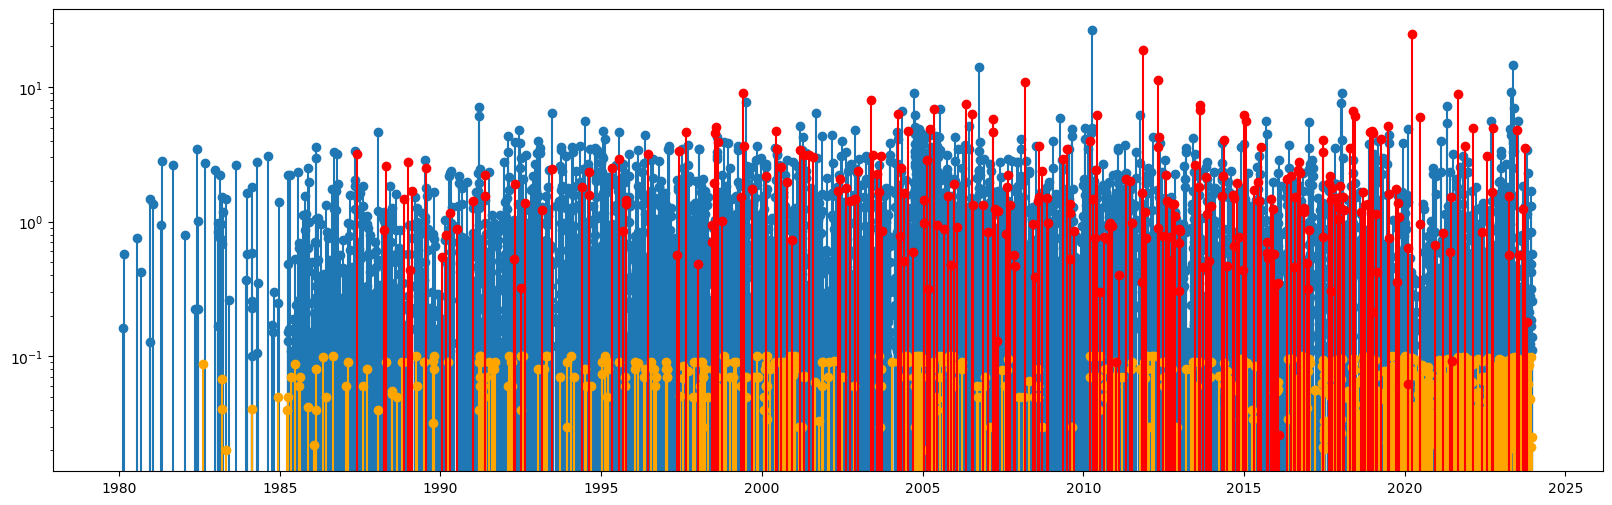

In [29]:
plt.figure(figsize=(20,6))
plt.stem(df_ce['ST'],df_ce['Displacement, mm'])
plt.stem(df_creeplet['ST'],df_creeplet['Displacement, mm'],linefmt='orange')
plt.stem(df_surge['ST'],df_surge['Displacement, mm'],linefmt='red')
plt.yscale('log')
plt.show()

In [30]:
colours  = cmap(np.linspace(0, 1, 11))
%matplotlib inline

<Figure size 1000x600 with 0 Axes>

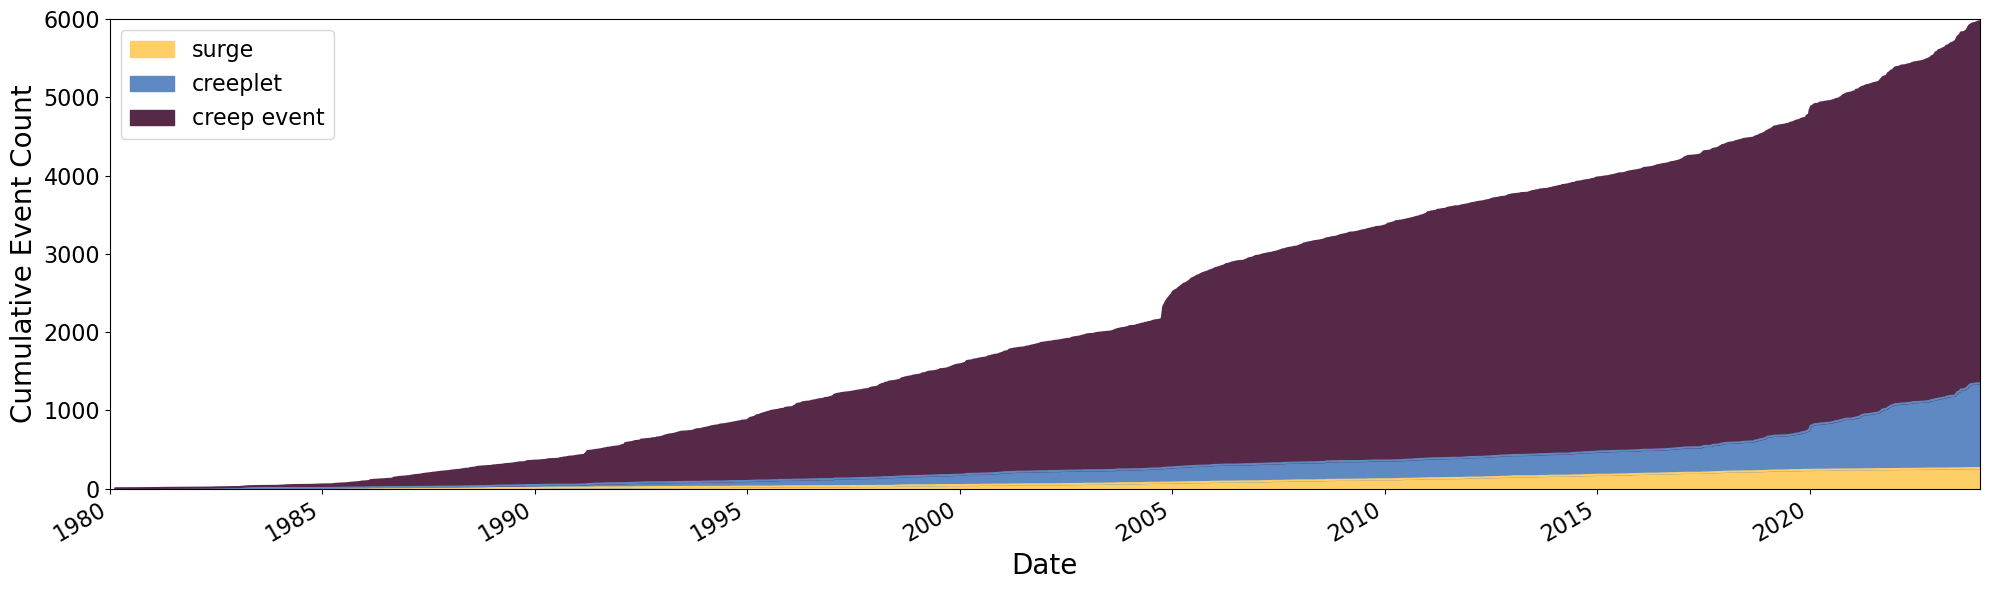

In [31]:
plt.figure(figsize=(10,6))

# Group by date and type
grouped = df_all_types.groupby([pd.Grouper(key='ST', freq='D'), 'type']).size().unstack(fill_value=0)

# Cumulative sum
cumulative = grouped.cumsum()

# Sort columns by total count (smallest to largest → largest on top)
sorted_cols = cumulative.iloc[-1].sort_values(ascending=True).index
cumulative_sorted = cumulative[sorted_cols]

# Plot
cumulative_sorted.plot(kind='area', stacked=True, figsize=(20, 6),
                       color=[colours[i] for i in [0, 8, 5]])  # Match colour to order if needed
plt.ylabel("Cumulative Event Count",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.ylim([0,6000])
#plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors=['k'],ymin=0,ymax=6000,linewidth=3)

#plt.vlines([dt.datetime(2004,9,28,17,15,24),dt.datetime(2018,9,6,0,0,0)],colors=['k','grey'],ymin=0,ymax=6000,linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
#plt.text(dt.datetime(2004,9,28,17,15,24),5900,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=14)
#plt.text(dt.datetime(2018,9,6,0,0,0),5900,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=14)
#plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet.pdf')
plt.show()

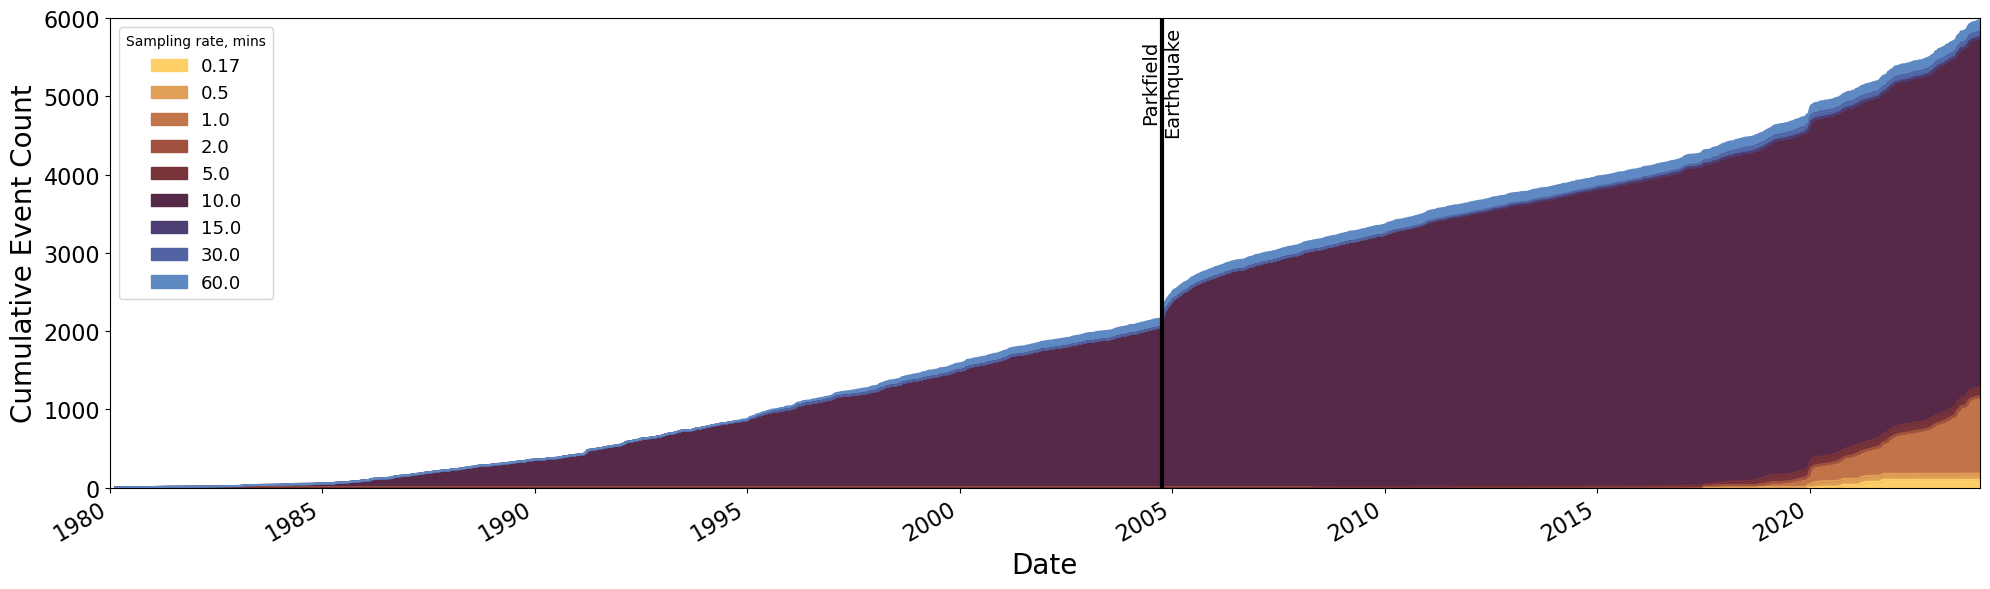

In [ ]:

# Group by date and type
grouped = df_all_types.groupby([pd.Grouper(key='ST', freq='D'), 'Sampling rate, mins']).size().unstack(fill_value=0)

# Cumulative sum
cumulative = grouped.cumsum()


# Plot
cumulative.plot(kind='area', stacked=True, figsize=(20, 6), color=colours)
plt.ylabel("Cumulative Event Count",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=11,title="Sampling rate, mins")
plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors=['k'],ymin=0,ymax=6000,linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13,title="Sampling rate, mins")
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.ylim([0,6000])
plt.tight_layout()
#plt.text(dt.datetime(2004,9,28,17,15,24),5900,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=14)
#plt.text(dt.datetime(2018,9,6,0,0,0),5900,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=14)
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_sampling.pdf')
plt.tight_layout()

plt.show()

In [33]:
df_all_types.drop(df_all_types[df_all_types['Sampling rate, mins']>=10].index)

Network      Creepmeter_full_name Creepmeter_abbrv  Latitude  Longitude  \
2907   SOCAL  Pipeline SSA Durmid Hill             DU30   33.4120  -115.7950   
3620   SOCAL  Pipeline SSA Durmid Hill             DU30   33.4120  -115.7950   
3718   SOCAL  Pipeline SSA Durmid Hill             DU30   33.4120  -115.7950   
3827   SOCAL  Pipeline SSA Durmid Hill             DU30   33.4120  -115.7950   
3945   SOCAL  Pipeline SSA Durmid Hill             DU30   33.4120  -115.7950   
...      ...                       ...              ...       ...        ...   
6157     EAF                    Tasmis             TAS1   38.2049    38.7872   
6159     EAF                    Tasmis             TAS1   38.2049    38.7872   
6160     HAY               Oakland Zoo             COZ1   37.7530  -122.1500   
6163     EAF               Yazica East             YZE1   38.1791    38.7526   
6164     EAF               Yazica East             YZE1   38.1791    38.7526   

      Sampling rate, mins                  ST                   ET  \
2907                  5.0 2006-07-29 10:15:29  2007-02-03 07:59:03   
3620                  5.0 2011-10-26 12:55:00  2011-12-18 23:10:00   
3718                  5.0 2012-09-06 11:47:47  2012-12-05 01:48:51   
3827                  5.0 2013-09-18 14:24:54  2014-01-16 05:39:54   
3945                  5.0 2014-10-08 06:27:45  2014-12-30 10:07:45   
...                   ...                 ...                  ...   
6157                  1.0 2023-12-06 10:55:03  2023-12-08 23:29:03   
6159                  1.0 2023-12-08 23:29:03  2023-12-10 16:19:03   
6160                  1.0 2023-12-09 04:16:00  2023-12-17 23:53:59   
6163                  1.0 2023-12-09 19:21:57  2023-12-11 13:17:57   
6164                  1.0 2023-12-11 13:17:57  2023-12-28 07:46:57   

      Displacement, mm  Duration, hrs   Event_id         type  
2907          1.338875    4533.726111  2907_DU30        surge  
3620          0.354493    1282.250000  3620_DU30        surge  
3718          0.763257    2150.017778  3718_DU30        surge  
3827          0.457261    2871.250000  3827_DU30        surge  
3945          1.918730    1995.666667  3945_DU30        surge  
...                ...            ...        ...          ...  
6157          0.419965      60.566667  6157_TAS1  creep event  
6159          1.300424      40.833333  6159_TAS1  creep event  
6160          0.317000     211.633056  6160_COZ1  creep event  
6163          0.834733      41.933333  6163_YZE1  creep event  
6164          0.487746     402.483333  6164_YZE1  creep event  

[1278 rows x 12 columns]

In [34]:
creepmeter_lifetimes = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv',index_col=0)
creepmeter_lifetimes['Start Time'] = pd.to_datetime(creepmeter_lifetimes['Start Time'])

In [35]:
#creepmeter_lifetimes.drop(creepmeter_lifetimes[creepmeter_lifetimes['Sampling rate, Hz']<=0.001667].index,inplace=True)

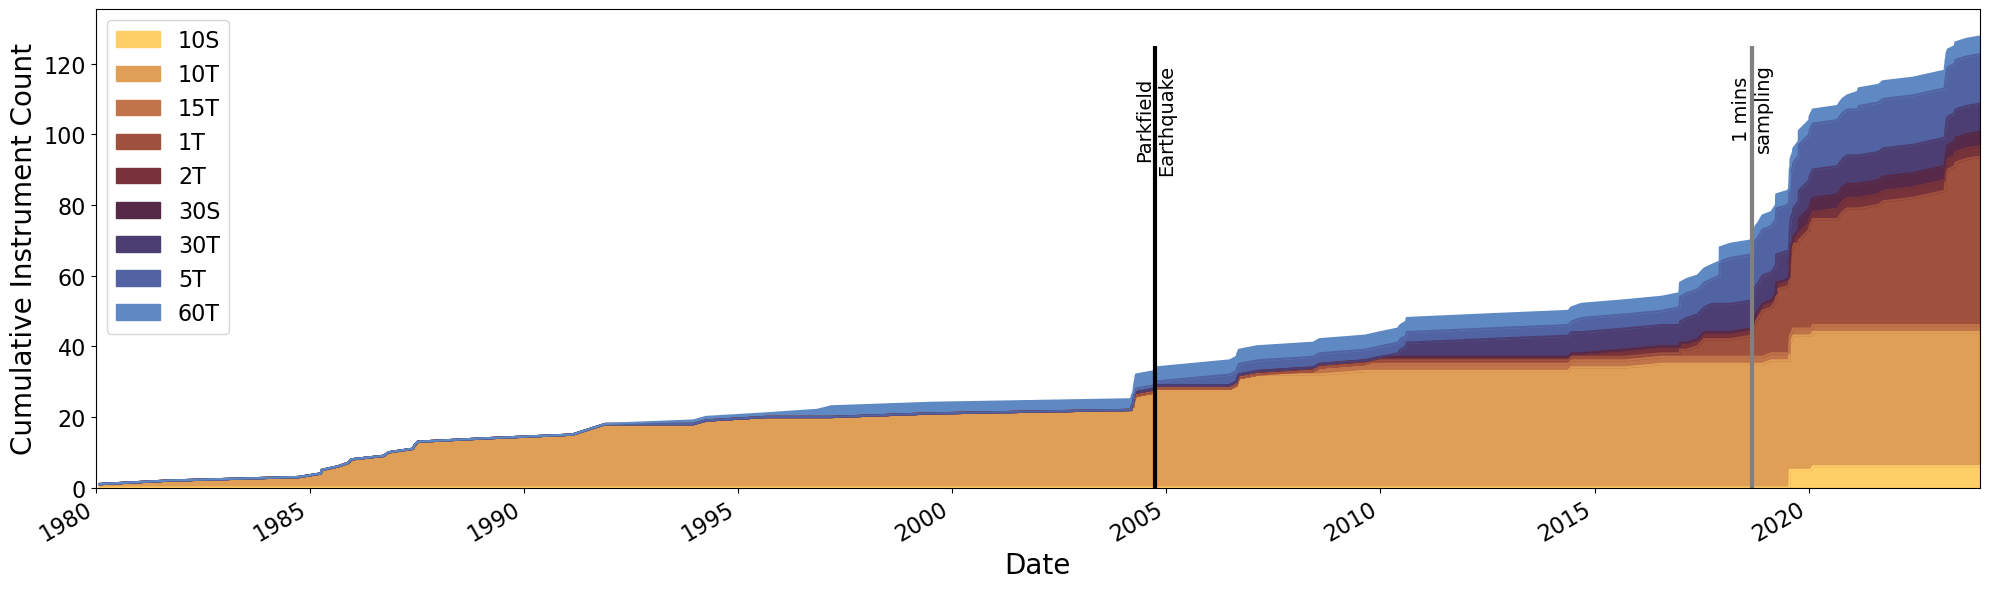

In [36]:
%matplotlib inline
# Group by date and type
grouped = creepmeter_lifetimes.groupby([pd.Grouper(key='Start Time', freq='D'), 'Sampling rate, mins']).size().unstack(fill_value=0)

# Cumulative sum
cumulative = grouped.cumsum()


# Plot
cumulative.plot(kind='area', stacked=True, figsize=(20, 6), color=colours)
plt.ylabel("Cumulative Instrument Count",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=11,title="Sampling rate, mins")
plt.tight_layout()
plt.vlines([dt.datetime(2004,9,28,17,15,24),dt.datetime(2018,9,6,0,0,0)],colors=['k','grey'],ymin=0,ymax=125,linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.text(dt.datetime(2004,9,28,17,15,24),120,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=14)
plt.text(dt.datetime(2018,9,6,0,0,0),120,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=14)

plt.savefig('../../Creep_catalog_stats_figures/Sampling_freqs_through_time_annotated.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/798899993.py:30: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  active_by_rate = active_matrix.groupby(axis=1, level=0).sum()


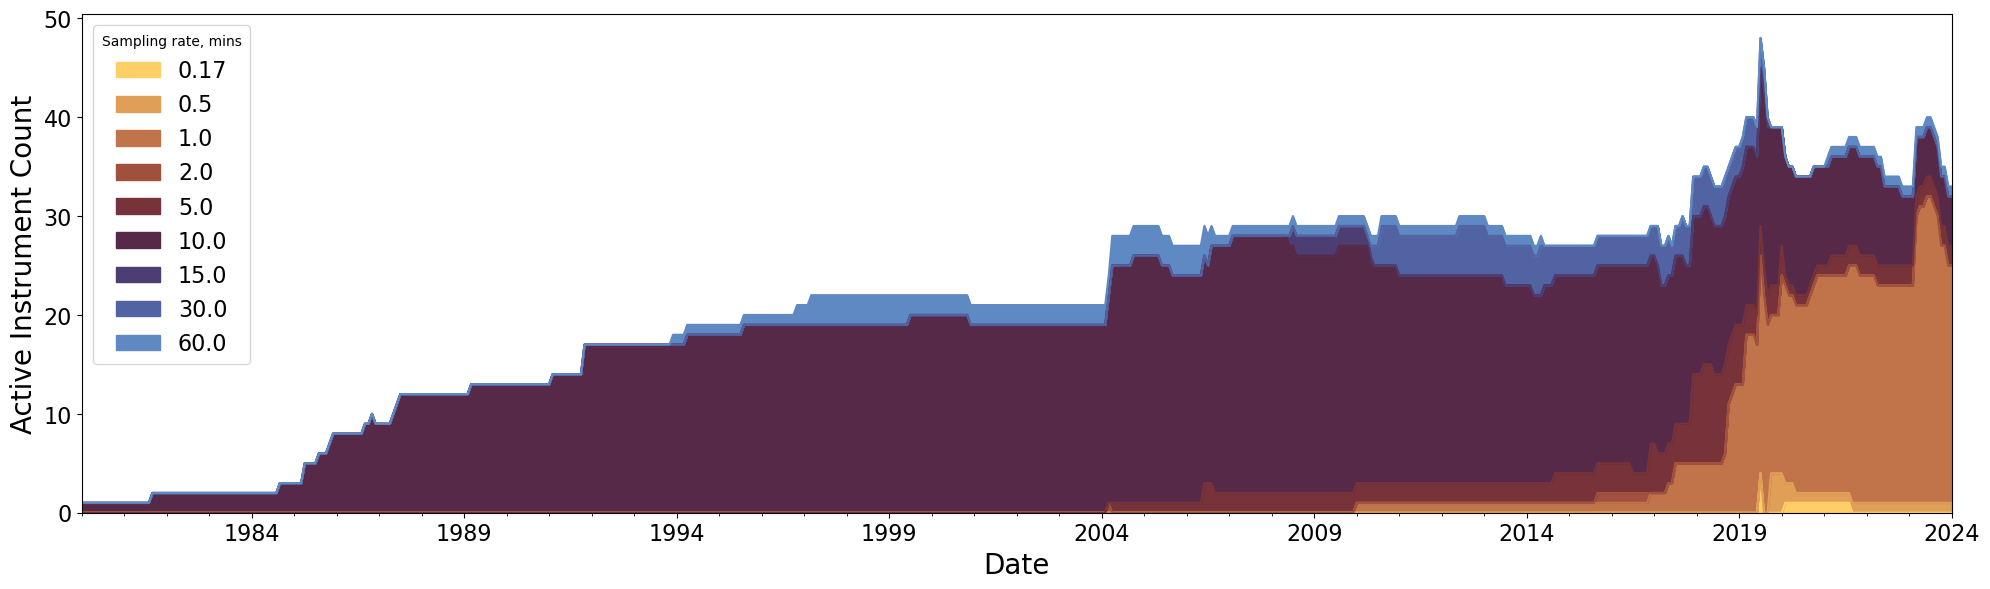

In [56]:
# Assume your df has: Start Time, End Time, Sampling rate, mins
creep = creepmeter_lifetimes.copy()
creep['End Time'] = pd.to_datetime(creep['End Time'])
creep['Start Time'] = pd.to_datetime(creep['Start Time'])

# Convert sampling rate strings (like "1T", "10T", "10S") to Timedelta objects
creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])

# Convert timedelta to minutes (float)
creep['Sampling rate, mins'] = round(creep['Sampling rate, mins'].dt.total_seconds()/60,2)

# Create daily date range
date_range = pd.date_range(start=creep['Start Time'].min().floor('D'), 
                           end=creep['End Time'].max().ceil('D'), freq='M')

# Create empty DataFrame with dates as index
active_matrix = pd.DataFrame(0, index=date_range, columns=creep.index)

# Fill matrix: mark instrument as active on each day it's alive
for idx, row in creep.iterrows():
    active_matrix.loc[row['Start Time'].floor('D'):row['End Time'].ceil('D'), idx] = 1

# Add sampling rate info
sampling_rate = creep['Sampling rate, mins']

# Replace columns with corresponding sampling rate
active_matrix.columns = sampling_rate

# Now group by sampling rate
active_by_rate = active_matrix.groupby(axis=1, level=0).sum()

# Plot
active_by_rate.plot(kind='area', stacked=True, figsize=(20, 6), color=colours)
plt.ylabel("Active Instrument Count", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title="Sampling rate, mins")
plt.tight_layout()

# Annotations
'''plt.vlines([dt.datetime(2004,1,1), dt.datetime(2017,11,1),dt.datetime(2023,2,1)],colors=['k', 'grey','lightgrey'], ymin=0, ymax=50, linewidth=3)
plt.text(dt.datetime(2004,1,1), 50,'Southern\nCalifornia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2017,11,1), 50, 'North\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2023,2,1), 50, 'East\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)'''

plt.savefig('../../Creep_catalog_stats_figures/Sampling_freqs_through_time_corrected.pdf')
plt.show()


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3356/920717474.py:30: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  active_by_rate = active_matrix.groupby(axis=1, level=0).sum()


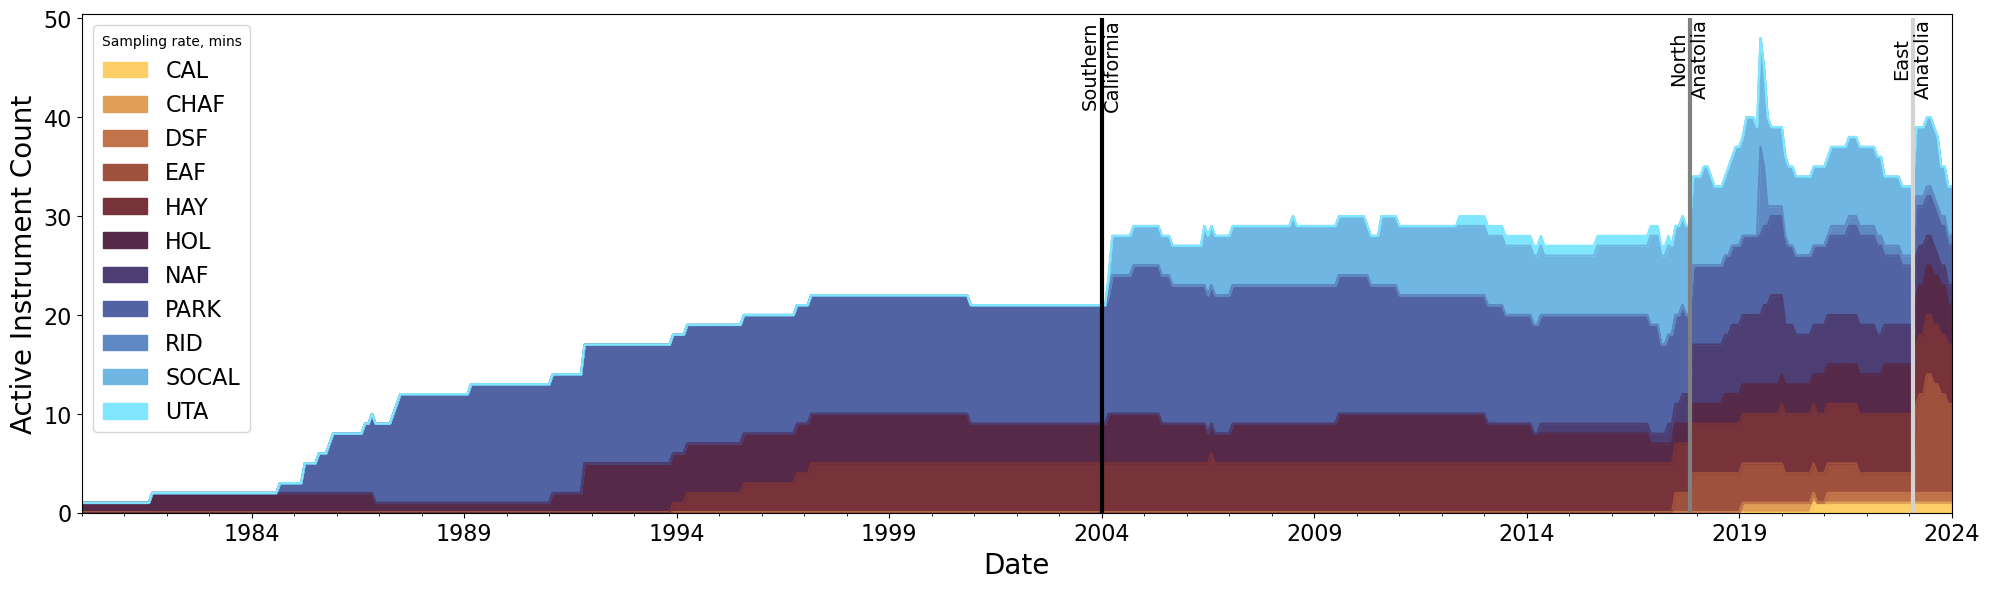

In [54]:
# Assume your df has: Start Time, End Time, Sampling rate, mins
creep = creepmeter_lifetimes.copy()
creep['End Time'] = pd.to_datetime(creep['End Time'])
creep['Start Time'] = pd.to_datetime(creep['Start Time'])

# Convert sampling rate strings (like "1T", "10T", "10S") to Timedelta objects
creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])

# Convert timedelta to minutes (float)
creep['Sampling rate, mins'] = round(creep['Sampling rate, mins'].dt.total_seconds()/60,2)

# Create daily date range
date_range = pd.date_range(start=creep['Start Time'].min().floor('D'), 
                           end=creep['End Time'].max().ceil('D'), freq='M')

# Create empty DataFrame with dates as index
active_matrix = pd.DataFrame(0, index=date_range, columns=creep.index)

# Fill matrix: mark instrument as active on each day it's alive
for idx, row in creep.iterrows():
    active_matrix.loc[row['Start Time'].floor('D'):row['End Time'].ceil('D'), idx] = 1

# Add sampling rate info
sampling_rate = creep['Network']

# Replace columns with corresponding sampling rate
active_matrix.columns = sampling_rate

# Now group by sampling rate
active_by_rate = active_matrix.groupby(axis=1, level=0).sum()

# Plot
active_by_rate.plot(kind='area', stacked=True, figsize=(20, 6), color=colours)
plt.ylabel("Active Instrument Count", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title="Sampling rate, mins")
plt.tight_layout()

# Annotations
plt.vlines([dt.datetime(2004,1,1), dt.datetime(2017,11,1),dt.datetime(2023,2,1)],colors=['k', 'grey','lightgrey'], ymin=0, ymax=50, linewidth=3)
plt.text(dt.datetime(2004,1,1), 50,'Southern\nCalifornia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2017,11,1), 50, 'North\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2023,2,1), 50, 'East\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)

#plt.savefig('../../Creep_catalog_stats_figures/Sampling_freqs_through_time_corrected.pdf')
plt.show()


In [ ]:
# Group by date and type
grouped = creepmeter_lifetimes.groupby([pd.Grouper(key='Start Time', freq='D'), 'Network']).size().unstack(fill_value=0)

# Cumulative sum
cumulative = grouped.cumsum()


# Plot
cumulative.plot(kind='area', stacked=True, figsize=(10, 5), color=colours)
plt.ylabel("Cumulative Event Count",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=11,title="Sampling rate, mins")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))
y=0
smpl_rate = np.unique(creepmeters['Sampling rate, mins'])
for i in range(len(creepmeters)):
    boolarr = np.where(creepmeter_lifetimes['Creepmeter_abbrv']==creepmeters['Creepmeter_abbrv'].iloc[i])[0]
    for j in range(len(boolarr)):
        selected = creepmeter_lifetimes.iloc[boolarr[j]]
        start = pd.to_datetime(selected['Start Time'])
        end = pd.to_datetime(selected['End Time'])
        # Plot the horizontal line
        color_choise = np.where(smpl_rate==selected['Sampling rate, mins'])
        plt.hlines(y, start, end, color=colours[color_choise], linewidth=2)

        # Plot vertical bars at the ends
        #plt.vlines([start, end], y - 0.1, y + 0.1, color=colours[color_choise], linewidth=2)
    y+=1
plt.yticks(np.arange(0,74),creepmeters['Creepmeter_abbrv'])
# Formatting
plt.ylim(73.5, -0.5)
#plt.xlim(2004, 2006)
plt.xlabel("Time (years)")
plt.tight_layout()
plt.show()

In [ ]:
bool

In [ ]:
np.unique(df_all_types['Network'])

In [ ]:
Hol_events = df_all_types[df_all_types["Network"].isin(["HOL", "CAL"])]
park_events = df_all_types[df_all_types["Network"].isin(['PARK'])]
Hay_events = df_all_types[df_all_types['Network'].isin(['HAY'])]
SoCal_events = df_all_types[df_all_types["Network"].isin(['SOCAL'])]

Cali_events = df_all_types[df_all_types["Network"].isin(["HAY","HOL", "CAL",'PARK',"SOCAL"])]

In [ ]:
plt.figure(figsize=(10,6))

# Group by latitude and type
grouped = Hol_events.groupby(['Latitude', 'type']).size().unstack(fill_value=0)

# Sort columns by total count so largest is plotted last (on top)
sorted_cols = grouped.sum().sort_values(ascending=True).index
grouped_sorted = grouped[sorted_cols]

# Sort latitude so it appears nicely on the x-axis
grouped_sorted = grouped_sorted.sort_index()

percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
percent.plot(kind='area', stacked=True, figsize=(20, 6),
                    color=[colours[i] for i in [0, 4, 8]])

plt.vlines(percent.index.to_list(),ymin=0,ymax=100,color='lightgrey',linestyle='--')
plt.plot(percent.index.to_list(),percent['creep event'],marker='o',color='k')
plt.plot(percent.index.to_list(),percent['creep event']+percent['creeplet'],marker='o',color='k')


# Axis labels, limits and formatting
plt.xlabel("Creepmeter", fontsize=20)
plt.ylabel("Event percentage", fontsize=20)
#plt.ylim([0, grouped_sorted.max().sum() + 500])  # optional padding
plt.xlim([np.max(HOL['Latitude']),np.min(HOL['Latitude'])])
plt.ylim([0,100])
plt.yticks(fontsize=16)
plt.xticks(np.unique(Hol_events['Latitude']),['XMR1','FCR1','CWC/N','XHR1/2/3','XSJ2/3','SJN1','XSH1'],fontsize=11,rotation=90)
plt.legend(fontsize=16, title="Event Type")
#plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_hollister.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

# Group by latitude and type
grouped = park_events.groupby(['Latitude', 'type']).size().unstack(fill_value=0)

# Sort columns by total count so largest is plotted last (on top)
sorted_cols = grouped.sum().sort_values(ascending=True).index
grouped_sorted = grouped[sorted_cols]

# Sort latitude so it appears nicely on the x-axis
grouped_sorted = grouped_sorted.sort_index()

percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
percent.plot(kind='area', stacked=True, figsize=(20, 6),
                    color=[colours[i] for i in [0, 4, 8]])

plt.vlines(percent.index.to_list(),ymin=0,ymax=100,color='lightgrey',linestyle='--')
plt.plot(percent.index.to_list(),percent['creep event'],marker='o',color='k')
plt.plot(percent.index.to_list(),percent['creep event']+percent['creeplet'],marker='o',color='k')


# Axis labels, limits and formatting
plt.xlabel("Creepmeter", fontsize=20)
plt.ylabel("Event percentage", fontsize=20)
#plt.ylim([0, grouped_sorted.max().sum() + 500])  # optional padding
plt.xlim([np.max(PARK['Latitude']),np.min(PARK['Latitude'])])
plt.ylim([0,100])
plt.yticks(fontsize=16)
plt.xticks(np.unique(park_events['Latitude']),['X641', 'C461/2', 'XGH1', 'CRR1', 'WKR1', 'XHSW', 'XTA1', 'XPK1/2', 'XRSW', 'XV1', 'XMD1', 'XMM1', 'XSC1'],fontsize=11,rotation=90)
plt.legend(fontsize=16, title="Event Type")
#plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_parkfield.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

# Group by latitude and type
grouped = Hay_events.groupby(['Latitude', 'type']).size().unstack(fill_value=0)

# Sort columns by total count so largest is plotted last (on top)
sorted_cols = grouped.sum().sort_values(ascending=True).index
grouped_sorted = grouped[sorted_cols]

# Sort latitude so it appears nicely on the x-axis
grouped_sorted = grouped_sorted.sort_index()

percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Get all unique latitudes
all_latitudes = HAY['Latitude'].unique()

# Create a DataFrame for percent with all latitudes as the index
percent_full = percent.reindex(all_latitudes, fill_value=0)


# Plot
percent_full.plot(kind='area', stacked=True, figsize=(20, 6),
                    color=[colours[i] for i in [0, 4, 8]])

plt.vlines(percent_full.index.to_list(),ymin=0,ymax=100,color='lightgrey',linestyle='--')
plt.plot(percent_full.index.to_list(),percent_full['creep event'],marker='o',color='k')
plt.plot(percent_full.index.to_list(),percent_full['creep event']+percent_full['creeplet'],marker='o',color='k')


# Axis labels, limits and formatting
plt.xlabel("Creepmeter", fontsize=20)
plt.ylabel("Event percentage", fontsize=20)
#plt.ylim([0, grouped_sorted.max().sum() + 500])  # optional padding
plt.xlim([np.max(HAY['Latitude']),np.min(HAY['Latitude'])])
plt.ylim([0,100])
plt.yticks(fontsize=16)
plt.xticks(np.unique(HAY['Latitude']),['CFW1','CHP1','COZ1','CTM1','CPP1'],fontsize=11,rotation=90)
plt.legend(fontsize=16, title="Event Type")
#plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_hayward.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

# Group by latitude and type
grouped = SoCal_events.groupby(['Latitude', 'type']).size().unstack(fill_value=0)

# Sort columns by total count so largest is plotted last (on top)
sorted_cols = grouped.sum().sort_values(ascending=True).index
grouped_sorted = grouped[sorted_cols]

# Sort latitude so it appears nicely on the x-axis
grouped_sorted = grouped_sorted.sort_index()

percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Get all unique latitudes
all_latitudes = SOCAL['Latitude'].unique()

# Create a DataFrame for percent with all latitudes as the index
percent_full = percent.reindex(all_latitudes, fill_value=0)


# Plot
percent_full.plot(kind='area', stacked=True, figsize=(20, 6),
                    color=[colours[i] for i in [0, 4, 8]])

plt.vlines(percent_full.index.to_list(),ymin=0,ymax=100,color='lightgrey',linestyle='--')
plt.plot(percent_full.index.to_list(),percent_full['creep event'],marker='o',color='k')
plt.plot(percent_full.index.to_list(),percent_full['creep event']+percent_full['creeplet'],marker='o',color='k')


# Axis labels, limits and formatting
plt.xlabel("Creepmeter", fontsize=20)
plt.ylabel("Event percentage", fontsize=20)
#plt.ylim([0, grouped_sorted.max().sum() + 500])  # optional padding
plt.xlim([np.max(SOCAL['Latitude']),np.min(SOCAL['Latitude'])])
plt.ylim([0,100])
plt.yticks(fontsize=16)
plt.xticks(np.unique(SOCAL['Latitude']),['RR45','SU30','SH30','DU30','SC30','FE30','NS45','IR30','QE30','QW30'],fontsize=11,rotation=90)
plt.legend(fontsize=16, title="Event Type")
#plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_socal.pdf')
plt.show()

In [ ]:
# Get unique latitudes and associated creepmeters
lat_creep = Cali_events.drop_duplicates(subset='Creepmeter_abbrv')[['Latitude', 'Creepmeter_abbrv']]

# Sort by latitude descending (north to south), assign x positions
lat_creep_sorted = lat_creep.sort_values(by='Latitude', ascending=False).reset_index(drop=True)
lat_creep_sorted['x'] = lat_creep_sorted.index

# Create mapping: Creepmeter -> x position
creep_to_x = lat_creep_sorted.set_index('Creepmeter_abbrv')['x'].to_dict()


# Get % composition per creepmeter (as before)
percent = Cali_events.groupby(['Creepmeter_abbrv', 'type']).size().unstack(fill_value=0)
percent = percent.div(percent.sum(axis=1), axis=0) * 100

# Add x-position to percent DataFrame
percent['x'] = percent.index.map(creep_to_x)

# Sort by x position
percent = percent.sort_values('x')

plt.figure(figsize=(20, 6))
ax = plt.subplot(1,1,1)
markers = ['o','s','^']
# Plot each event type
for event_type, colour, markers in zip(percent.columns.drop('x'), [colours[i] for i in [5, 3, 8]],[markers[i] for i in [0,1,2]]):
    plt.plot(percent['x'], percent[event_type], marker=markers, label=event_type, color=colour)

# Label x-axis with creepmeter names in order
ordered_creepmeters = percent.index.to_list()
plt.xticks(ticks=percent['x'], labels=ordered_creepmeters, rotation=90, ha='center', fontsize=14)

# Axis formatting
plt.ylabel("Event Percentage", fontsize=20)
plt.xlabel("Creepmeter (ordered north to south)", fontsize=20)
plt.ylim([0, 140])
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title="Event Type")
rect_Hawyard = patches.Rectangle((-0.5, -1), width=4, height=141, linewidth=2, edgecolor=colours[0], facecolor=colours[0],alpha=0.2)
rect_Calaveras = patches.Rectangle((3.5, -1), width=1, height=141, linewidth=2, edgecolor=colours[1], facecolor=colours[1],alpha=0.2)
rect_Hollister = patches.Rectangle((4.5, -1), width=10, height=141, linewidth=2, edgecolor=colours[2], facecolor=colours[2],alpha=0.2)
rect_Parkfield = patches.Rectangle((14.5, -1), width=15, height=141, linewidth=2, edgecolor=colours[4], facecolor=colours[4],alpha=0.2)
rect_SoCal = patches.Rectangle((29.5, -1), width=7, height=141, linewidth=2, edgecolor=colours[6], facecolor=colours[6],alpha=0.2)
rect_NS = patches.Rectangle((36.5, -1), width=1, height=141, linewidth=2, edgecolor=colours[7], facecolor=colours[7],alpha=0.2)
rect_SU = patches.Rectangle((37.5, -1), width=1, height=141, linewidth=2, edgecolor=colours[8], facecolor=colours[8],alpha=0.2)
rect_IM = patches.Rectangle((38.5, -1), width=1, height=141, linewidth=2, edgecolor=colours[9], facecolor=colours[9],alpha=0.2)

# Add the patch to the Axes
ax.add_patch(rect_Hawyard)
ax.add_patch(rect_Calaveras)
ax.add_patch(rect_Hollister)
ax.add_patch(rect_Parkfield)
ax.add_patch(rect_SoCal)
ax.add_patch(rect_NS)
ax.add_patch(rect_SU)
ax.add_patch(rect_IM)

plt.xlim([-0.5,39.5])
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])
plt.hlines(100,-0.5,39.5,'k')
plt.text(3,130,'Hayward\nFault', rotation=90,verticalalignment='top',horizontalalignment='center')
plt.text(4,130,'Calaveras\nFault', rotation=90,verticalalignment='top',horizontalalignment='center')
plt.text(9,125,'San Andreas Fault: Hollister',verticalalignment='top',horizontalalignment='center')
plt.text(21.5,125,'San Andreas Fault: Parkfield',verticalalignment='top',horizontalalignment='center')
plt.text(33,125,'San Andreas Fault: Salton Sea',verticalalignment='top',horizontalalignment='center')
plt.text(37,140,'North Shoreline\nFault', rotation=90,verticalalignment='top',horizontalalignment='center')
plt.text(38,140,'Superstition Hills\nFault', rotation=90,verticalalignment='top',horizontalalignment='center')
plt.text(39,140,'Imperial\nFault', rotation=90,verticalalignment='top',horizontalalignment='center')
plt.legend(loc='upper left', bbox_to_anchor=(0.001, 0.95))
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_by_creepmeter.pdf')
plt.show()


In [ ]:
NAF_events = df_all_types[df_all_types["Network"].isin(['NAF'])]
NAF_events['Creepmeter_abbrv'].unique()

In [ ]:
# Get unique latitudes and associated creepmeters
lat_creep = NAF_events.drop_duplicates(subset='Creepmeter_abbrv')[['Longitude', 'Creepmeter_abbrv']]

# Sort by latitude descending (north to south), assign x positions
lat_creep_sorted = lat_creep.sort_values(by='Longitude', ascending=True).reset_index(drop=True)
lat_creep_sorted['x'] = lat_creep_sorted.index

# Create mapping: Creepmeter -> x position
creep_to_x = lat_creep_sorted.set_index('Creepmeter_abbrv')['x'].to_dict()


# Get % composition per creepmeter (as before)
percent = NAF_events.groupby(['Creepmeter_abbrv', 'type']).size().unstack(fill_value=0)
percent = percent.div(percent.sum(axis=1), axis=0) * 100

# Add x-position to percent DataFrame
percent['x'] = percent.index.map(creep_to_x)

# Sort by x position
percent = percent.sort_values('x')

plt.figure(figsize=(20, 6))
ax = plt.subplot(1,1,1)
markers = ['o','s','^']
# Plot each event type
for event_type, colour, markers in zip(percent.columns.drop('x'), [colours[i] for i in [5, 3, 8]],[markers[i] for i in [0,1,2]]):
    plt.plot(percent['x'], percent[event_type], marker=markers, label=event_type, color=colour)

# Label x-axis with creepmeter names in order
ordered_creepmeters = percent.index.to_list()
plt.xticks(ticks=percent['x'], labels=ordered_creepmeters, rotation=90, ha='center', fontsize=14)

# Axis formatting
plt.ylabel("Event Percentage", fontsize=20)
plt.xlabel("Creepmeter (ordered east to west)", fontsize=20)
plt.ylim([0, 100])
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title="Event Type")
plt.xlim([-0.5,9.5])
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])
plt.hlines(100,-0.5,9.5,'k')




plt.legend(loc='upper left', bbox_to_anchor=(0.001, 0.95))
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_by_creepmeter_NAF.pdf')
plt.show()


In [ ]:
EAF_events = df_all_types[df_all_types["Network"].isin(['EAF'])]

# Get unique latitudes and associated creepmeters
lat_creep = EAF_events.drop_duplicates(subset='Creepmeter_abbrv')[['Longitude', 'Creepmeter_abbrv']]

# Sort by latitude descending (north to south), assign x positions
lat_creep_sorted = lat_creep.sort_values(by='Longitude', ascending=True).reset_index(drop=True)
lat_creep_sorted['x'] = lat_creep_sorted.index

# Create mapping: Creepmeter -> x position
creep_to_x = lat_creep_sorted.set_index('Creepmeter_abbrv')['x'].to_dict()


# Get % composition per creepmeter (as before)
percent = EAF_events.groupby(['Creepmeter_abbrv', 'type']).size().unstack(fill_value=0)
percent = percent.div(percent.sum(axis=1), axis=0) * 100

# Add x-position to percent DataFrame
percent['x'] = percent.index.map(creep_to_x)

# Sort by x position
percent = percent.sort_values('x')

plt.figure(figsize=(20, 6))
ax = plt.subplot(1,1,1)
markers = ['o','s','^']
# Plot each event type
for event_type, colour, markers in zip(percent.columns.drop('x'), [colours[i] for i in [5, 3, 8]],[markers[i] for i in [0,1,2]]):
    plt.plot(percent['x'], percent[event_type], marker=markers, label=event_type, color=colour)

# Label x-axis with creepmeter names in order
ordered_creepmeters = percent.index.to_list()
plt.xticks(ticks=percent['x'], labels=ordered_creepmeters, rotation=90, ha='center', fontsize=14)

# Axis formatting
plt.ylabel("Event Percentage", fontsize=20)
plt.xlabel("Creepmeter (ordered east to west)", fontsize=20)
plt.ylim([0, 100])
plt.yticks(fontsize=16)
plt.legend(fontsize=16, title="Event Type")
plt.xlim([-0.5,12.5])
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])
plt.hlines(100,-0.5,9.5,'k')




plt.legend(loc='upper left', bbox_to_anchor=(0.001, 0.95))
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/event_v_surge_v_creeplet_by_creepmeter_EAF.pdf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data
event_types = ['Creep events', 'Creep surges', 'Creeplets']
durations = [2.38, 48, 0.53]           # in days
displacements = [0.47, 1.48, 0.058]    # in mm
counts = [4625, 262, 1083]             # number of events
colors = ['goldenrod', 'steelblue', 'darkred']

# Scale sizes for better visual separation (adjust factor if needed)
sizes = [c / 2 for c in counts]

# Create scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(durations[0], displacements[0],s=sizes[0], c=colors[0], alpha=0.7)#,label=f'{event_types[i]} ({counts[i]} events)')
plt.scatter(durations[1], displacements[1],s=sizes[1], c=colors[1], alpha=0.7)#,label=f'{event_types[i]} ({counts[i]} events)')
plt.scatter(durations[2], displacements[2],s=sizes[2], c=colors[2], alpha=0.7)#,label=f'{event_types[i]} ({counts[i]} events)')
# Labels and formatting
plt.xlabel('Median Duration (days)')
plt.ylabel('Median Displacement (mm)')
plt.title('Aseismic Creep Event Summary')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
